### DATA UNDERSTANDING


### Import neccessary Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import os
import missingno as msno

pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings("ignore")

#### LOAD DATA SET FOR THE YEAR 2020

In [2]:
# Read each file using the function
dot1_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot1_ytd_0920.csv")
dot2_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot2_ytd_0920.csv")
dot3_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot3_ytd_0920.csv")


#Shape of the dot(n)_ytd files
print("Original Shape of the data levels YTD files for 2020")
print(f"Shape of data for dot1: {dot1_ytd.shape}")
print(f"Shape of data for dot2: {dot2_ytd.shape}")
print(f"Shape of data for dot3: {dot3_ytd.shape}")

Original Shape of the data levels YTD files for 2020
Shape of data for dot1: (232029, 14)
Shape of data for dot2: (634881, 14)
Shape of data for dot3: (148522, 12)


### LOAD DATA SET FOR THE YEAR 2021

In [3]:
# Read each file using the function
dot1_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot1_ytd_1221.csv")
dot2_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot2_ytd_1221.csv")
dot3_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot3_ytd_1221.csv")


#Shape of the dot(n)_ytd files
print("Original Shape of the data levels YTD files for 2021")
print(f"Shape of data for dot1: {dot1_ytd.shape}")
print(f"Shape of data for dot2: {dot2_ytd.shape}")
print(f"Shape of data for dot3: {dot3_ytd.shape}")

Original Shape of the data levels YTD files for 2021
Shape of data for dot1: (327584, 14)
Shape of data for dot2: (902616, 14)
Shape of data for dot3: (207778, 12)


### LOAD DATA SET FOR THE YEAR 2022

In [5]:
# Read each file using the function
dot1_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot1_ytd_1222.csv")
dot2_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot2_ytd_1222.csv")
dot3_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot3_ytd_1222.csv")


#Initial shape of the dot(n)_ytd files
print("Original Shape of the data levels YTD files for 2022")
print(f"Shape of data for dot1: {dot1_ytd.shape}")
print(f"Shape of data for dot2: {dot2_ytd.shape}")
print(f"Shape of data for dot3: {dot3_ytd.shape}")

Original Shape of the data levels YTD files for 2022
Shape of data for dot1: (338101, 14)
Shape of data for dot2: (923340, 14)
Shape of data for dot3: (210356, 12)


### LOAD DATA SET FOR THE YEAR 2023
#### There is a need for updating the YTD files, which some of the months miss, so we can load and concatenate for 2023 data.

In [6]:
# Month order and their number mapping
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

month_numbers = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04',
    'May': '05', 'June': '06', 'July': '07', 'August': '08',
    'September': '09', 'October': '10', 'November': '11', 'December': '12'
}

# Base path and target year
data_dir = r'C:/Users/solos/Downloads/data'
target_year = '2023'
year_suffix = target_year[-2:]  # '23'

# List of DOT versions to process
dot_versions = ['dot1', 'dot2', 'dot3']

# Loop over each DOT version
for dot_version in dot_versions:
    print(f"\n=== Processing {dot_version.upper()} ===")

    for i in range(1, len(month_order) + 1):
        current_month = month_order[i - 1]
        current_month_number = month_numbers[current_month]

        # YTD output filename (e.g., dot1_ytd_0123.csv)
        ytd_filename = f"{dot_version}_ytd_{current_month_number}{year_suffix}.csv"
        ytd_path = os.path.join(data_dir, target_year, current_month, ytd_filename)

        if os.path.exists(ytd_path):
            print(f"[SKIP] {ytd_filename} already exists.")
            continue

        ytd_frames = []

        # Combine files from January up to the current month
        for j in range(i):
            month_j = month_order[j]
            month_j_number = month_numbers[month_j]
            input_filename = f"{dot_version}_{month_j_number}{year_suffix}.csv"
            input_path = os.path.join(data_dir, target_year, month_j, input_filename)

            if os.path.exists(input_path):
                df = pd.read_csv(input_path)
                ytd_frames.append(df)
            else:
                print(f"[MISSING] {input_filename} not found. Skipping.")

        # Save new YTD file
        if ytd_frames:
            ytd_df = pd.concat(ytd_frames, ignore_index=True)
            os.makedirs(os.path.join(data_dir, target_year, current_month), exist_ok=True)
            ytd_df.to_csv(ytd_path, index=False)
            print(f"[CREATED] {ytd_filename}")
        else:
            print(f"[WARNING] No data available to build {ytd_filename}")


=== Processing DOT1 ===
[SKIP] dot1_ytd_0123.csv already exists.
[SKIP] dot1_ytd_0223.csv already exists.
[SKIP] dot1_ytd_0323.csv already exists.
[SKIP] dot1_ytd_0423.csv already exists.
[SKIP] dot1_ytd_0523.csv already exists.
[SKIP] dot1_ytd_0623.csv already exists.
[SKIP] dot1_ytd_0723.csv already exists.
[SKIP] dot1_ytd_0823.csv already exists.
[SKIP] dot1_ytd_0923.csv already exists.
[SKIP] dot1_ytd_1023.csv already exists.
[SKIP] dot1_ytd_1123.csv already exists.
[SKIP] dot1_ytd_1223.csv already exists.

=== Processing DOT2 ===
[SKIP] dot2_ytd_0123.csv already exists.
[SKIP] dot2_ytd_0223.csv already exists.
[SKIP] dot2_ytd_0323.csv already exists.
[SKIP] dot2_ytd_0423.csv already exists.
[SKIP] dot2_ytd_0523.csv already exists.
[SKIP] dot2_ytd_0623.csv already exists.
[SKIP] dot2_ytd_0723.csv already exists.
[SKIP] dot2_ytd_0823.csv already exists.
[SKIP] dot2_ytd_0923.csv already exists.
[SKIP] dot2_ytd_1023.csv already exists.
[SKIP] dot2_ytd_1123.csv already exists.
[SKIP] 

In [7]:
# Read each file using the function
dot1_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot1_ytd_1223.csv")
dot2_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot2_ytd_1223.csv")
dot3_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot3_ytd_1223.csv")


#Shape of the dot(n)_ytd files
print("Original Shape for the data levels YTD files for 2023")
print(f"Shape of data for dot1: {dot1_ytd.shape}")
print(f"Shape of data for dot2: {dot2_ytd.shape}")
print(f"Shape of data for dot3: {dot3_ytd.shape}")

Original Shape for the data levels YTD files for 2023
Shape of data for dot1: (341668, 14)
Shape of data for dot2: (932344, 14)
Shape of data for dot3: (209463, 12)


### LOAD DATA SET FOR THE YEAR 2024
#### There is a need for updating the YTD files, which some of the months miss, so we can load and concatenate for 2024 data.

In [7]:
# Month order and their number mapping
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September'
]

month_numbers = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04',
    'May': '05', 'June': '06', 'July': '07', 'August': '08',
    'September': '09'
}

# Base path and target year
data_dir = r'C:/Users/solos/Downloads/data'
target_year = '2024'
year_suffix = target_year[-2:]  # '24'

# List of DOT versions to process
dot_versions = ['dot1', 'dot2', 'dot3']

# Loop over each DOT version
for dot_version in dot_versions:
    print(f"\n=== Processing {dot_version.upper()} ===")

    for i in range(1, len(month_order) + 1):
        current_month = month_order[i - 1]
        current_month_number = month_numbers[current_month]

        # YTD output filename (e.g., dot1_ytd_0124.csv)
        ytd_filename = f"{dot_version}_ytd_{current_month_number}{year_suffix}.csv"
        ytd_path = os.path.join(data_dir, target_year, current_month, ytd_filename)

        if os.path.exists(ytd_path):
            print(f"[SKIP] {ytd_filename} already exists.")
            continue

        ytd_frames = []

        # Combine files from January up to the current month
        for j in range(i):
            month_j = month_order[j]
            month_j_number = month_numbers[month_j]
            input_filename = f"{dot_version}_{month_j_number}{year_suffix}.csv"
            input_path = os.path.join(data_dir, target_year, month_j, input_filename)

            if os.path.exists(input_path):
                df = pd.read_csv(input_path)
                ytd_frames.append(df)
            else:
                print(f"[MISSING] {input_filename} not found. Skipping.")

        # Save new YTD file
        if ytd_frames:
            ytd_df = pd.concat(ytd_frames, ignore_index=True)
            os.makedirs(os.path.join(data_dir, target_year, current_month), exist_ok=True)
            ytd_df.to_csv(ytd_path, index=False)
            print(f"[CREATED] {ytd_filename}")
        else:
            print(f"[WARNING] No data available to build {ytd_filename}")


=== Processing DOT1 ===
[SKIP] dot1_ytd_0124.csv already exists.
[SKIP] dot1_ytd_0224.csv already exists.
[SKIP] dot1_ytd_0324.csv already exists.
[SKIP] dot1_ytd_0424.csv already exists.
[SKIP] dot1_ytd_0524.csv already exists.
[SKIP] dot1_ytd_0624.csv already exists.
[SKIP] dot1_ytd_0724.csv already exists.
[SKIP] dot1_ytd_0824.csv already exists.
[SKIP] dot1_ytd_0924.csv already exists.

=== Processing DOT2 ===
[SKIP] dot2_ytd_0124.csv already exists.
[SKIP] dot2_ytd_0224.csv already exists.
[SKIP] dot2_ytd_0324.csv already exists.
[SKIP] dot2_ytd_0424.csv already exists.
[SKIP] dot2_ytd_0524.csv already exists.
[SKIP] dot2_ytd_0624.csv already exists.
[SKIP] dot2_ytd_0724.csv already exists.
[SKIP] dot2_ytd_0824.csv already exists.
[SKIP] dot2_ytd_0924.csv already exists.

=== Processing DOT3 ===
[SKIP] dot3_ytd_0124.csv already exists.
[SKIP] dot3_ytd_0224.csv already exists.
[SKIP] dot3_ytd_0324.csv already exists.
[SKIP] dot3_ytd_0424.csv already exists.
[SKIP] dot3_ytd_0524.cs

In [8]:
# Read each file using the function
dot1_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot1_ytd_0924.csv")
dot2_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot2_ytd_0924.csv")
dot3_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot3_ytd_0924.csv")


#Shape of the dot(n)_ytd files
print("Original Shape for the data levels YTD files for 2024")
print(f"Shape of data for dot1: {dot1_ytd.shape}")
print(f"Shape of data for dot2: {dot2_ytd.shape}")
print(f"Shape of data for dot3: {dot3_ytd.shape}")

Original Shape for the data levels YTD files for 2024
Shape of data for dot1: (261103, 14)
Shape of data for dot2: (708443, 14)
Shape of data for dot3: (138997, 12)


### DATA PREPARATION
##### 1. Combining all the respecstive levels of the data
##### 2. Combining all the data levels for the Years (2020 -2024)
##### 3. Cleaning the data
##### 4. Preprocessing the data

#### Data Levels
##### <u>Aggregation Level</u> -----------------------------<u>DOT</u>
##### National-level Summary --------------------- dot1
##### State-level Summary ------------------------ dot2
##### Port-level Summary ------------------------- dot3


#### Combine dataset for dot1, dot2, and dot3

In [21]:
# Insert data for processing National-level Summary
dot1_ytd_2020 = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot1_ytd_0920.csv")
dot1_ytd_2021 = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot1_ytd_1221.csv")
dot1_ytd_2022 = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot1_ytd_1222.csv")
dot1_ytd_2023 = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot1_ytd_1223.csv")
dot1_ytd_2024 = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot1_ytd_0924.csv")

# Concatenate all dataframes
df_dot1 = pd.concat([dot1_ytd_2020, dot1_ytd_2021, dot1_ytd_2022, dot1_ytd_2023, dot1_ytd_2024], axis=0, ignore_index=True)

#Initial shape of the dot(n)_ytd files
print(f"Shape of data for dot1_ytd_2020: {dot1_ytd_2020.shape}")
print(f"Shape of data for dot1_ytd_2021: {dot1_ytd_2021.shape}")
print(f"Shape of data for dot1_ytd_2022: {dot1_ytd_2022.shape}")
print(f"Shape of data for dot1_ytd_2023: {dot1_ytd_2023.shape}")
print(f"Shape of data for dot1_ytd_2024: {dot1_ytd_2024.shape}")

#Actual shape of the dataframe
print(f"\nShape of Combined National-level data : {df_dot1.shape}")
df_dot1.head()

print("\nMissing values percentage for National Level Summary")
print(df_dot1.isnull().mean() * 100)

Shape of data for dot1_ytd_2020: (232029, 14)
Shape of data for dot1_ytd_2021: (327584, 14)
Shape of data for dot1_ytd_2022: (338101, 14)
Shape of data for dot1_ytd_2023: (341668, 14)
Shape of data for dot1_ytd_2024: (261103, 14)

Shape of Combined National-level data : (1500485, 14)

Missing values percentage for National Level Summary
TRDTYPE            0.00
USASTATE           0.00
DEPE               0.00
DISAGMOT           0.00
MEXSTATE          70.72
CANPROV           36.83
COUNTRY            0.00
VALUE              0.00
SHIPWT             0.00
FREIGHT_CHARGES    0.00
DF                37.67
CONTCODE           0.00
MONTH              0.00
YEAR               0.00
dtype: float64


In [22]:
# Insert data for processing National-level Summary
dot2_ytd_2020 = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot2_ytd_0920.csv")
dot2_ytd_2021 = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot2_ytd_1221.csv")
dot2_ytd_2022 = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot2_ytd_1222.csv")
dot2_ytd_2023 = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot2_ytd_1223.csv")
dot2_ytd_2024 = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot2_ytd_0924.csv")

# Concatenate all dataframes
df_dot2 = pd.concat([dot2_ytd_2020, dot2_ytd_2021, dot2_ytd_2022, dot2_ytd_2023, dot2_ytd_2024], axis=0, ignore_index=True)

#Initial shape of the dot(n)_ytd files
print(f"Shape of data for dot2_ytd_2020: {dot2_ytd_2020.shape}")
print(f"Shape of data for dot2_ytd_2021: {dot2_ytd_2021.shape}")
print(f"Shape of data for dot2_ytd_2022: {dot2_ytd_2022.shape}")
print(f"Shape of data for dot2_ytd_2023: {dot2_ytd_2023.shape}")
print(f"Shape of data for dot2_ytd_2024: {dot2_ytd_2024.shape}")


#Actual shape of the dataframe
print(f"\nShape of Combined State-level data : {df_dot2.shape}")
df_dot2.head()

print("\nMissing values percentage for State Level Summary")
print(df_dot2.isnull().mean() * 100)

Shape of data for dot2_ytd_2020: (634881, 14)
Shape of data for dot2_ytd_2021: (902616, 14)
Shape of data for dot2_ytd_2022: (923340, 14)
Shape of data for dot2_ytd_2023: (932344, 14)
Shape of data for dot2_ytd_2024: (708443, 14)

Shape of Combined State-level data : (4101624, 14)

Missing values percentage for State Level Summary
TRDTYPE            0.00
USASTATE           0.00
COMMODITY2         0.00
DISAGMOT           0.00
MEXSTATE          65.85
CANPROV           40.27
COUNTRY            0.00
VALUE              0.00
SHIPWT             0.00
FREIGHT_CHARGES    0.00
DF                30.50
CONTCODE           0.00
MONTH              0.00
YEAR               0.00
dtype: float64


In [23]:
# Insert data for processing National-level Summary
dot3_ytd_2020 = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot3_ytd_0920.csv")
dot3_ytd_2021 = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot3_ytd_1221.csv")
dot3_ytd_2022 = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot3_ytd_1222.csv")
dot3_ytd_2023 = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot3_ytd_1223.csv")
dot3_ytd_2024 = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot3_ytd_0924.csv")

# Concatenate all dataframes
df_dot3 = pd.concat([dot3_ytd_2020, dot3_ytd_2021, dot3_ytd_2022, dot3_ytd_2023, dot3_ytd_2024], axis=0, ignore_index=True)

#Initial shape of the dot(n)_ytd files
print(f"Shape of data for dot3_ytd_2020: {dot3_ytd_2020.shape}")
print(f"Shape of data for dot3_ytd_2021: {dot3_ytd_2021.shape}")
print(f"Shape of data for dot3_ytd_2022: {dot3_ytd_2022.shape}")
print(f"Shape of data for dot3_ytd_2023: {dot3_ytd_2023.shape}")
print(f"Shape of data for dot3_ytd_2024: {dot3_ytd_2024.shape}")

#Actual shape of the dataframe
print(f"\nShape of Combined Port-level data : {df_dot3.shape}")
df_dot3.head()

print("\nMissing values percentage for Port level Summary")
print(df_dot3.isnull().mean() * 100)

Shape of data for dot3_ytd_2020: (148522, 12)
Shape of data for dot3_ytd_2021: (207778, 12)
Shape of data for dot3_ytd_2022: (210356, 12)
Shape of data for dot3_ytd_2023: (209463, 12)
Shape of data for dot3_ytd_2024: (138997, 12)

Shape of Combined Port-level data : (915116, 12)

Missing values percentage for Port level Summary
TRDTYPE            0.00
DEPE               0.00
COMMODITY2         0.00
DISAGMOT           0.00
COUNTRY            0.00
VALUE              0.00
SHIPWT             0.00
FREIGHT_CHARGES    0.00
DF                40.23
CONTCODE           0.00
MONTH              0.00
YEAR               0.00
dtype: float64


### KEYNOTES AND TAKES(COMMENTS) ON DATA PREPARATION FOR THE DATA LEVELS
#### TAKES(COMMENTS)
The "Missing Values Problem" Was Misleading Across Combined Data
Initially, combining all levels (dot1, dot2, dot3) made it seem like many columns had a high percentage of missing values.

But when viewed per level, most columns are complete — except MEXSTATE, CANPROV, and DF.

This implies:
➤ The missingness was not due to poor data quality,
➤ It was because some columns are not applicable at certain data levels.

1. Do not combine/ merge all the data levels (that is dot1, dot2, and dot3).
   REASON: it creates confusion in data because it returns falsed missing values which can lead to BIAS in making Analysis.
2. After Combinng the data on each level, it wise to kick of with making analysis for Integrity.

In [14]:
#Descriptive statistics for National-level
df_dot1.describe()

,TRDTYPE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR
count,1500485.00,1500485.00,1500485.00,1500485.00,1500485.00,1500485.00,935285.00,1500485.00,1500485.00
mean,1.38,4.84,1510.94,4294599.67,1748638.23,56133.22,1.33,6.02,2022.05
std,0.48,1.42,381.05,46785693.55,47744200.03,1180990.57,0.47,3.26,1.33
min,1.00,1.00,1220.00,0.00,0.00,0.00,1.00,1.00,2020.00
25%,1.00,5.00,1220.00,19850.00,0.00,0.00,1.00,3.00,2021.00
50%,1.00,5.00,1220.00,103337.00,3.00,382.00,1.00,6.00,2022.00
75%,2.00,5.00,2010.00,666874.00,9575.00,3784.00,2.00,9.00,2023.00
max,2.00,9.00,2010.00,4951806412.00,8563935547.00,227553073.00,2.00,12.00,2024.00


In [13]:
#Descriptive statistics for State-level
df_dot2.describe()

,TRDTYPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR
count,4101624.00,4101624.00,4101624.00,4101624.00,4101624.00,4101624.00,4101624.00,2850437.00,4101624.00,4101624.00
mean,1.31,57.12,4.78,1538.15,1571080.72,639699.16,20535.05,1.33,6.02,2022.04
std,0.46,27.68,1.11,387.45,25834190.73,29960006.49,765073.75,0.47,3.26,1.32
min,1.00,1.00,1.00,1220.00,1.00,0.00,0.00,1.00,1.00,2020.00
25%,1.00,34.00,5.00,1220.00,12300.00,0.00,0.00,1.00,3.00,2021.00
50%,1.00,61.00,5.00,1220.00,57477.00,0.00,200.00,1.00,6.00,2022.00
75%,2.00,84.00,5.00,2010.00,308105.25,851.00,2068.00,2.00,9.00,2023.00
max,2.00,99.00,9.00,2010.00,5595625173.00,8563935547.00,248721434.00,2.00,12.00,2024.00


In [15]:
#Descriptive statistics for Port-level
df_dot3.describe()

,TRDTYPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR
count,915116.00,915116.00,915116.00,915116.00,915116.00,915116.00,915116.00,546935.00,915116.00,915116.00
mean,1.40,55.61,4.57,1545.73,6895783.76,2814601.19,90220.52,1.37,6.07,2021.98
std,0.49,28.35,1.54,388.88,60026160.17,63642456.38,1602077.22,0.48,3.26,1.31
min,1.00,1.00,1.00,1220.00,0.00,0.00,0.00,1.00,1.00,2020.00
25%,1.00,31.00,3.00,1220.00,19295.00,0.00,0.00,1.00,3.00,2021.00
50%,1.00,59.00,5.00,1220.00,128893.00,50.00,585.00,1.00,6.00,2022.00
75%,2.00,84.00,5.00,2010.00,1098667.75,11486.00,7554.00,2.00,9.00,2023.00
max,2.00,99.00,9.00,2010.00,5331093651.00,9068699755.00,238945217.00,2.00,12.00,2024.00


#### check for duplicate files

In [24]:
# List of dataframes to check
dfs = [df_dot1, df_dot2, df_dot3]
names = ["df_dot1", "df_dot2", "df_dot3"]

# Loop through each dataframe
for df, name in zip(dfs, names):
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"Found {duplicates} duplicate rows in {name}.")
    else:
        print(f"No duplicate rows found in {name}.")

No duplicate rows found in df_dot1.
No duplicate rows found in df_dot2.
No duplicate rows found in df_dot3.


#### check for null values in the actual data level files

In [25]:
# List of dataframes and their labels
dfs = [df_dot1, df_dot2, df_dot3]
names = ["df_dot1", "df_dot2", "df_dot3"]

# Loop through each dataframe and report nulls per column
for df, name in zip(dfs, names):
    print(f"\nNull values in {name}:")
    null_counts = df.isnull().sum()
    has_nulls = null_counts[null_counts > 0]
    if not has_nulls.empty:
        print(has_nulls)
    else:
        print("No null values found in any column.")


Null values in df_dot1:
MEXSTATE    1061208
CANPROV      552589
DF           565200
dtype: int64

Null values in df_dot2:
MEXSTATE    2700940
CANPROV     1651792
DF          1251187
dtype: int64

Null values in df_dot3:
DF    368181
dtype: int64


#### KEY NOTES AND TAKEAWAYS
Do NOT treat Null / blank DF values as missing data — they are actually structural nulls, meaning "not applicable".
keep the DF column as it is but only analyze it in the context of exports (TRDTYPE = 1).

TRDTYPE = 1 (Exports) → DF is either 1 (Domestic) or 2 (Foreign).
TRDTYPE = 2 (Imports) → DF is blank/missing.

The DF (Domestic/Foreign) code is only applicable for exports — not for imports.
In export records:
DF = 1: The origin of the export is domestic (produced in the U.S.).
DF = 2: The origin of the export is foreign (re-exported goods, i.e., imported into the U.S. first, then exported again).

In import records:
DF is blank because it doesn't apply. You don’t track whether the imported good is domestic or foreign — it’s all foreign by nature.

#### check for blank values in the actual data level files where both MEXSTATE and CANPROV is null

In [26]:
# List of cleaned dataframes and their labels
dfs = [df_dot1, df_dot2, df_dot3]
names = ["df_dot1", "df_dot2", "df_dot3"]

for df, name in zip(dfs, names):
    print(f"\n{name}:")

    # Check if both columns exist
    required_cols = {"MEXSTATE", "CANPROV"}
    missing_cols = required_cols - set(df.columns)

    if missing_cols:
        print(f"  Skipped check — missing columns: {', '.join(missing_cols)}")
    else:
        # Create mask for rows missing both values
        mask = df["MEXSTATE"].isnull() & df["CANPROV"].isnull()
        count = mask.sum()
        if count > 0:
            print(f"  Found {count} rows where both MEXSTATE and CANPROV are missing.")
        else:
            print("  No rows found where both MEXSTATE and CANPROV are missing.")



df_dot1:
  Found 113312 rows where both MEXSTATE and CANPROV are missing.

df_dot2:
  Found 251108 rows where both MEXSTATE and CANPROV are missing.

df_dot3:
  Skipped check — missing columns: CANPROV, MEXSTATE


#### check for null values in (MEXSTATE | CANPROV) and replace with 'Unknown'

In [27]:
# Define target folder for saving cleaned files
save_folder = os.path.expanduser("~/Downloads/data/cleaned")
os.makedirs(save_folder, exist_ok=True)

# List of dataframes and their labels
dfs = [df_dot1, df_dot2, df_dot3]
names = ["df_dot1", "df_dot2", "df_dot3"]

# Loop through each dataframe
for df, name in zip(dfs, names):
    required_cols = {"MEXSTATE", "CANPROV"}
    missing_cols = required_cols - set(df.columns)

    if missing_cols:
        print(f"{name}: Skipping update — missing columns: {', '.join(missing_cols)}")
    else:
        # Identify rows where both MEXSTATE and CANPROV are missing
        mask = df["MEXSTATE"].isnull() & df["CANPROV"].isnull()
        print(f"{name}: Found {mask.sum()} rows missing both MEXSTATE and CANPROV.")

        # Replace with 'Unknown'
        df.loc[mask, ["MEXSTATE", "CANPROV"]] = "Unknown"

    # Save file with update (whether modified or not)
    out_path = os.path.join(save_folder, f"{name}_cleaned.csv")
    df.to_csv(out_path, index=False)
    print(f"{name}: Saved to '{out_path}'")

df_dot1: Found 113312 rows missing both MEXSTATE and CANPROV.
df_dot1: Saved to 'C:\Users\solos/Downloads/data/cleaned\df_dot1_cleaned.csv'
df_dot2: Found 251108 rows missing both MEXSTATE and CANPROV.
df_dot2: Saved to 'C:\Users\solos/Downloads/data/cleaned\df_dot2_cleaned.csv'
df_dot3: Skipping update — missing columns: CANPROV, MEXSTATE
df_dot3: Saved to 'C:\Users\solos/Downloads/data/cleaned\df_dot3_cleaned.csv'


#### verify for blank values in the cleaned data level files with (MEXSTATE and CANPRONV)

In [28]:
# List of cleaned dataframes and their labels
dfs = [df_dot1, df_dot2, df_dot3]
names = ["df_dot1", "df_dot2", "df_dot3"]

for df, name in zip(dfs, names):
    print(f"\n{name}:")

    # Check if both columns exist
    required_cols = {"MEXSTATE", "CANPROV"}
    missing_cols = required_cols - set(df.columns)

    if missing_cols:
        print(f"  Skipped check — missing columns: {', '.join(missing_cols)}")
    else:
        # Create mask for rows missing both values
        mask = df["MEXSTATE"].isnull() & df["CANPROV"].isnull()
        count = mask.sum()
        if count > 0:
            print(f"  Found {count} rows where both MEXSTATE and CANPROV are missing.")
        else:
            print("  No rows found where both MEXSTATE and CANPROV are missing.")


df_dot1:
  No rows found where both MEXSTATE and CANPROV are missing.

df_dot2:
  No rows found where both MEXSTATE and CANPROV are missing.

df_dot3:
  Skipped check — missing columns: CANPROV, MEXSTATE


In [67]:
print(df_dot1.isnull().mean() * 100)

TRDTYPE            0.00
USASTATE           0.00
DEPE               0.00
DISAGMOT           0.00
MEXSTATE          63.17
CANPROV           29.28
COUNTRY            0.00
VALUE              0.00
SHIPWT             0.00
FREIGHT_CHARGES    0.00
DF                37.67
CONTCODE           0.00
MONTH              0.00
YEAR               0.00
dtype: float64


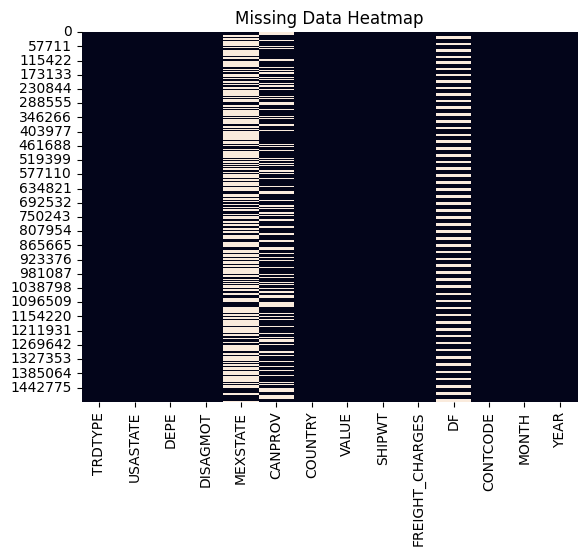

In [66]:
sns.heatmap(df_dot1.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [69]:
# Define function to check unique values per column
def check_unique_values(df, name):
    print(f"\nUnique values in {name}:")
    for column in df.columns:
        print(f"{column}: {df[column].nunique()} unique values")
        print(df[column].unique())
        print('-' * 40)

# List of dataframes and their labels
df_list = [df_dot1, df_dot2, df_dot3]
df_names = ["df_dot1", "df_dot2", "df_dot3"]

# Loop through each dataframe
for df, name in zip(df_list, df_names):
    check_unique_values(df, name)


Unique values in df_dot1:
TRDTYPE: 2 unique values
[1 2]
----------------------------------------
USASTATE: 52 unique values
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
----------------------------------------
DEPE: 246 unique values
['07XX' '20XX' '2304' '2506' '2604' '3004' '3023' '30XX' '3101' '3103'
 '3104' '3106' '31XX' '3310' '3401' '3403' '3801' '3802' '4101' '41XX'
 '5201' '70XX' '0106' '0109' '0115' '0211' '04XX' '0701' '0708' '0712'
 '0901' '17XX' '18XX' '19XX' '2006' '2301' '2302' '2303' '2305' '2310'
 '2402' '2403' '2404' '2503' '2507' '2601' '2608' '3001' '3009' '3301'
 '3302' '3318' '3322' '34XX' '3501' '35XX' '3604' '3701' '3803' '38XX'
 '4102' '5203' '52XX' '55XX' '0101' '0704' '09XX' '3019' '3422' '01XX'
 '0212' '0417' '11XX' '2408' '2501' '2505' '260

### BUSINESS QUESTIONS
#### Analytical Questions to Address:
1.	What is the highest mode of transportation over the years?
2.  How is freight moving across different transportation modes over time and regions?
3.  How much freight cost is incurred per dollar of trade value moved?
4.	How has the total trade value evolved from 2020 to 2024?
5.	Which mode of transportation dominates trade, and how has its share changed over time?
6.	Which U.S. ports (by state or code) handle the most freight, and what are the bottlenecks? 
7.	Is there any seasonal pattern in freight movement (e.g., more trade in Q4)?
8.	How much does each mode contribute to economic productivity across regions (e.g., by border state)?
9.	What are the top 10 U.S. states (USASTATE) by total freight value?
10.	How has the total freight value changed over time?
11.	What commodities (COMMODITY2) contribute the most to freight value?
12. Which country is the biggest trade partners based on freight value?
13. What is the trend of freight weight (SHIPWT) vs value (VALUE) over the years?
14. Which modes or routes are least environmentally friendly?

### **What is the highest mode of transportation over the years?**

**Preferred Data Level:**
Use the National Level Summary (dot1) for answering this question.

**Why?**
The national-level data aggregates all states and ports, giving the most complete, high-level view of transportation trends across the U.S.–Canada–Mexico trade system.

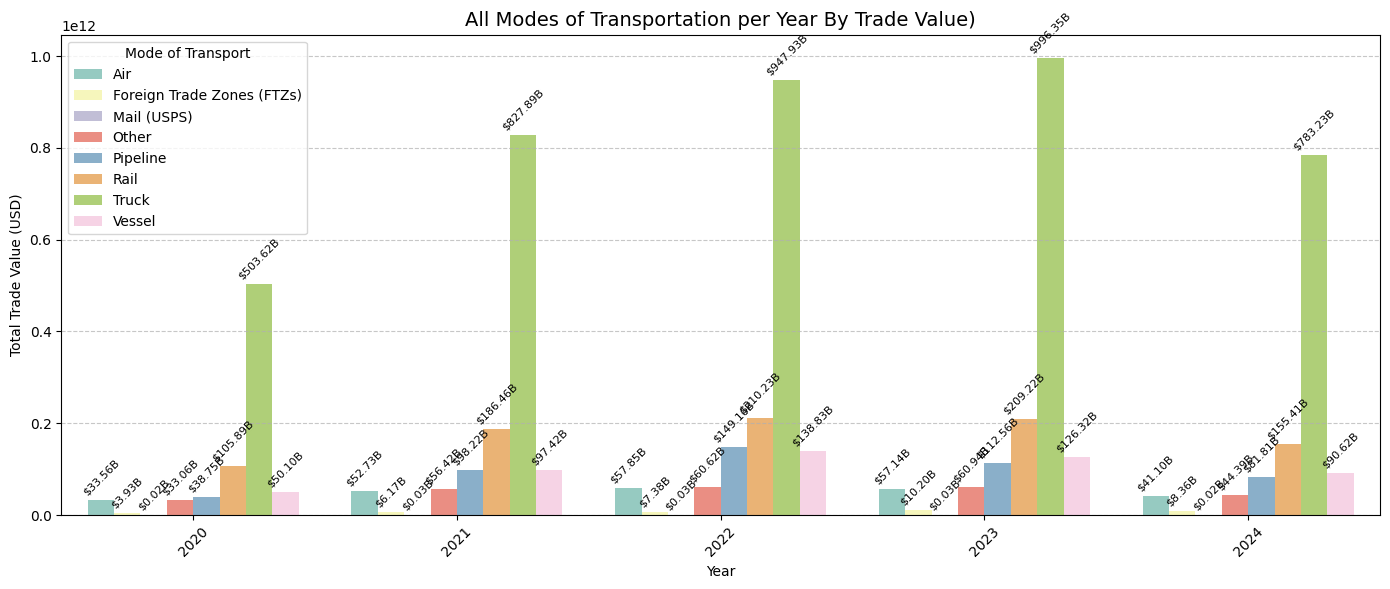

In [109]:
# Load National Level Summary data (dot1)
df_dot1 = pd.read_csv("C:/Users/solos/Downloads/data/df_dot1.csv")  

# Map DISAGMOT codes to transport names
disagmot_map = {
    1: 'Vessel',
    3: 'Air',
    4: 'Mail (USPS)',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'Foreign Trade Zones (FTZs)'
}

# Replace DISAGMOT code with name
df_dot1['DISAGMOT'] = df_dot1['DISAGMOT'].map(disagmot_map)

# Group and summarize VALUE by YEAR and DISAGMOT (Mode of Transport)
mode_value_summary = df_dot1.groupby(['YEAR', 'DISAGMOT'])['VALUE'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(14, 6))
barplot = sns.barplot(
    data=mode_value_summary,
    x='YEAR',
    y='VALUE',
    hue='DISAGMOT',
    palette='Set3'
)

# Add data labels for all bars
for container in barplot.containers:
    barplot.bar_label(
        container,
        labels=[f"${v/1e9:.2f}B" for v in container.datavalues],
        label_type="edge",
        fontsize=8,
        rotation=45,
        padding=2
    )

# Customize the plot
plt.title("All Modes of Transportation per Year By Trade Value)", fontsize=14)
plt.ylabel("Total Trade Value (USD)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title='Mode of Transport')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

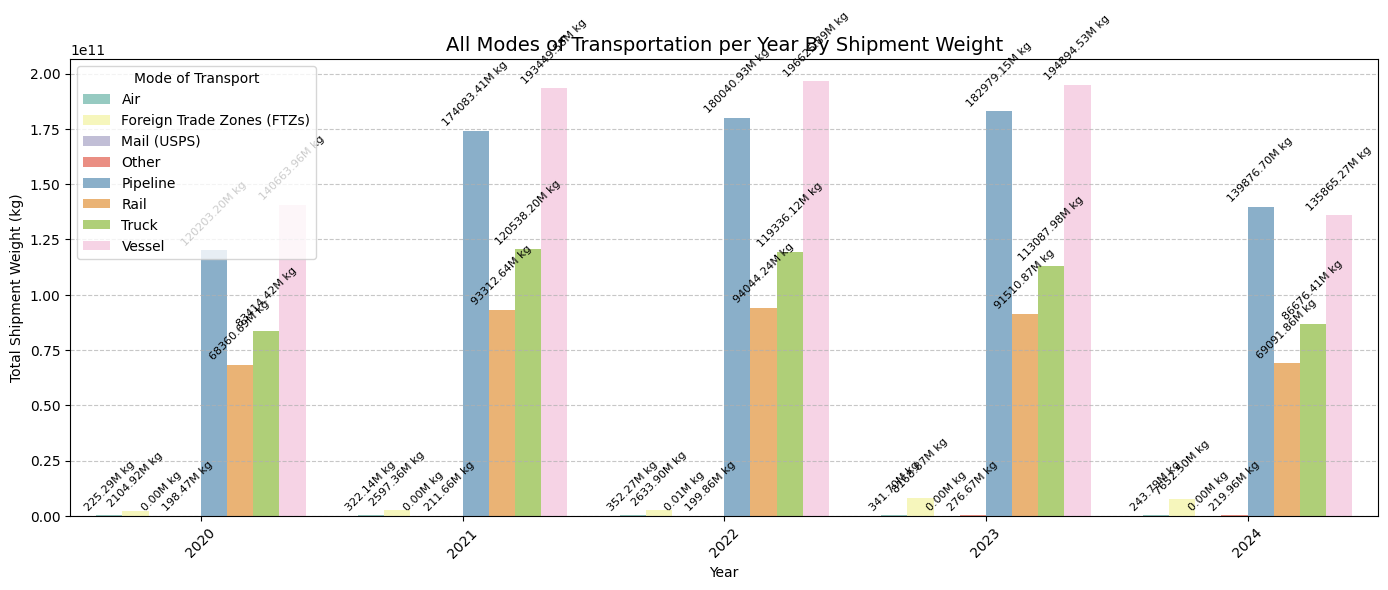

In [95]:
# Load National Level Summary data (dot1)
df_dot1 = pd.read_csv("C:/Users/solos/Downloads/data/df_dot1.csv")  

# Map DISAGMOT codes to transport names
disagmot_map = {
    1: 'Vessel',
    3: 'Air',
    4: 'Mail (USPS)',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'Foreign Trade Zones (FTZs)'
}

# Replace DISAGMOT code with name
df_dot1['DISAGMOT'] = df_dot1['DISAGMOT'].map(disagmot_map)

# Group and summarize SHIPWT by YEAR and DISAGMOT (Mode of Transport)
mode_weight_summary = df_dot1.groupby(['YEAR', 'DISAGMOT'])['SHIPWT'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(14, 6))
barplot = sns.barplot(
    data=mode_weight_summary,
    x='YEAR',
    y='SHIPWT',
    hue='DISAGMOT',
    palette='Set3'
)

# Add data labels for all bars
for container in barplot.containers:
    barplot.bar_label(
        container,
        labels=[f"{v/1e6:.2f}M kg" for v in container.datavalues],  # Showing values in million kg
        label_type="edge",
        fontsize=8,
        rotation=45,
        padding=2
    )

# Customize the plot
plt.title("All Modes of Transportation per Year By Shipment Weight", fontsize=14)
plt.ylabel("Total Shipment Weight (kg)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title='Mode of Transport')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

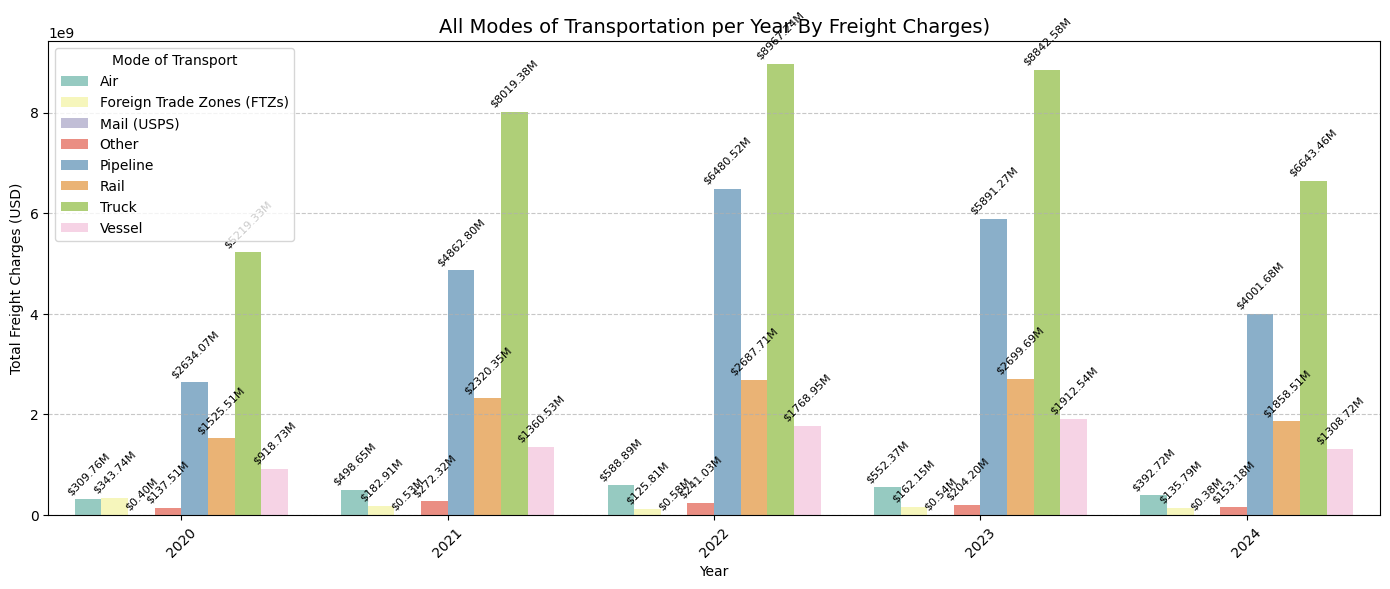

In [156]:
# Load National Level Summary data (dot1)
df_dot1 = pd.read_csv("C:/Users/solos/Downloads/data/df_dot1.csv")  

# Map DISAGMOT codes to transport names
disagmot_map = {
    1: 'Vessel',
    3: 'Air',
    4: 'Mail (USPS)',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'Foreign Trade Zones (FTZs)'
}

# Replace DISAGMOT code with name
df_dot1['DISAGMOT'] = df_dot1['DISAGMOT'].map(disagmot_map)

# Group and summarize FREIGHT_CHARGES by YEAR and DISAGMOT (Mode of Transport)
freight_summary = df_dot1.groupby(['YEAR', 'DISAGMOT'])['FREIGHT_CHARGES'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(14, 6))
barplot = sns.barplot(
    data=freight_summary,
    x='YEAR',
    y='FREIGHT_CHARGES',
    hue='DISAGMOT',
    palette='Set3'
)

# Add data labels for all bars
for container in barplot.containers:
    barplot.bar_label(
        container,
        labels=[f"${v/1e6:.2f}M" for v in container.datavalues],
        label_type="edge",
        fontsize=8,
        rotation=45,
        padding=2
    )

# Customize the plot
plt.title("All Modes of Transportation per Year By Freight Charges)", fontsize=14)
plt.ylabel("Total Freight Charges (USD)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title='Mode of Transport')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

### **How is freight moving across different transportation modes over time and regions?**

Goals:
Analyze volume trends by mode of transportation.
Identify common routes or corridors.
Uncover regional differences (states, borders).
Visualize how freight movement shifts over time.

**Preferred Dataset Level:**
Use the National (dot1) and State Level (dot2) datasets for broad trends and regional routing.
Use Port Level (dot3) for detailed routing or entry/exit analysis.

**INSIGHTS**
**-Is road transport increasing or declining over time?**

Road Transport increased at a Trade Cost Value of 827Billion USD  from the year 2021 uptill 2023 at a Trade Cost Value of 996Billion USD untill its decreasing value of 703Billion USD.  

**-Are certain states or ports dominated by one transport mode?**

Port Laredo in the Texas dominated with Truck mode of transport at a value of $962.31 Billion

**-How does seasonality (via MONTH) impact mode usage?**

During the third quater of most years, usage with mode of transport (e.g. Truck and Rail) hits the peak.
Also, its usage declines during the last quater of the year which possibly could be due to weather limitations such as winter season.

**-Do imports vs exports (via TRDTYPE) use different transport patterns?**

Imports favor bulk and volume, hence the dominance of truck and rail.
Exports lean toward speed and precision, with air and mail(USPS) playing bigger roles.
Trade asymmetry is clear: exports are less concentrated in fewer modes, while imports are more distributed.

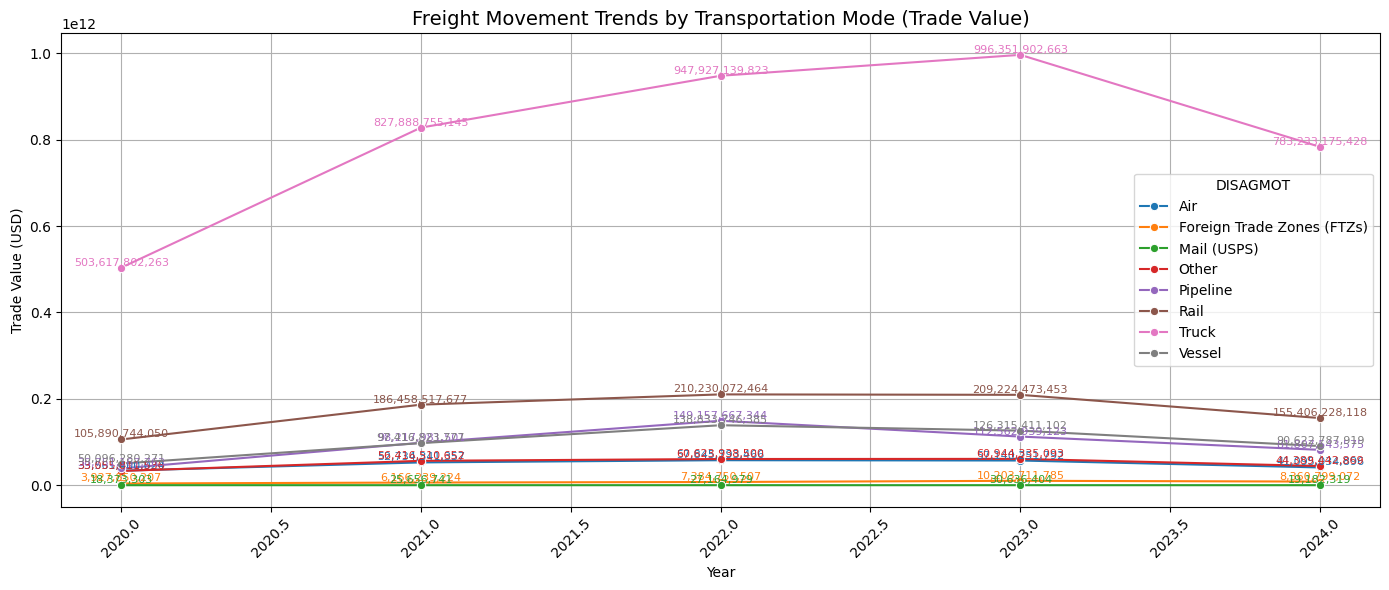

In [143]:
# Sum VALUE by Year and Mode of Transport
mode_volume_trend = df_dot1.groupby(['YEAR', 'DISAGMOT'])['VALUE'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(14, 6))
lineplot = sns.lineplot(data=mode_volume_trend, x='YEAR', y='VALUE', hue='DISAGMOT', marker='o', palette='tab10')

# Add data labels for each point
for line in lineplot.lines:
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
        if not pd.isna(y_val):
            plt.text(x_val, y_val, f'{y_val:,.0f}', fontsize=8, color=line.get_color(), ha='center', va='bottom')

# Customize layout
plt.title("Freight Movement Trends by Transportation Mode (Trade Value)", fontsize=14)
plt.ylabel("Trade Value (USD)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

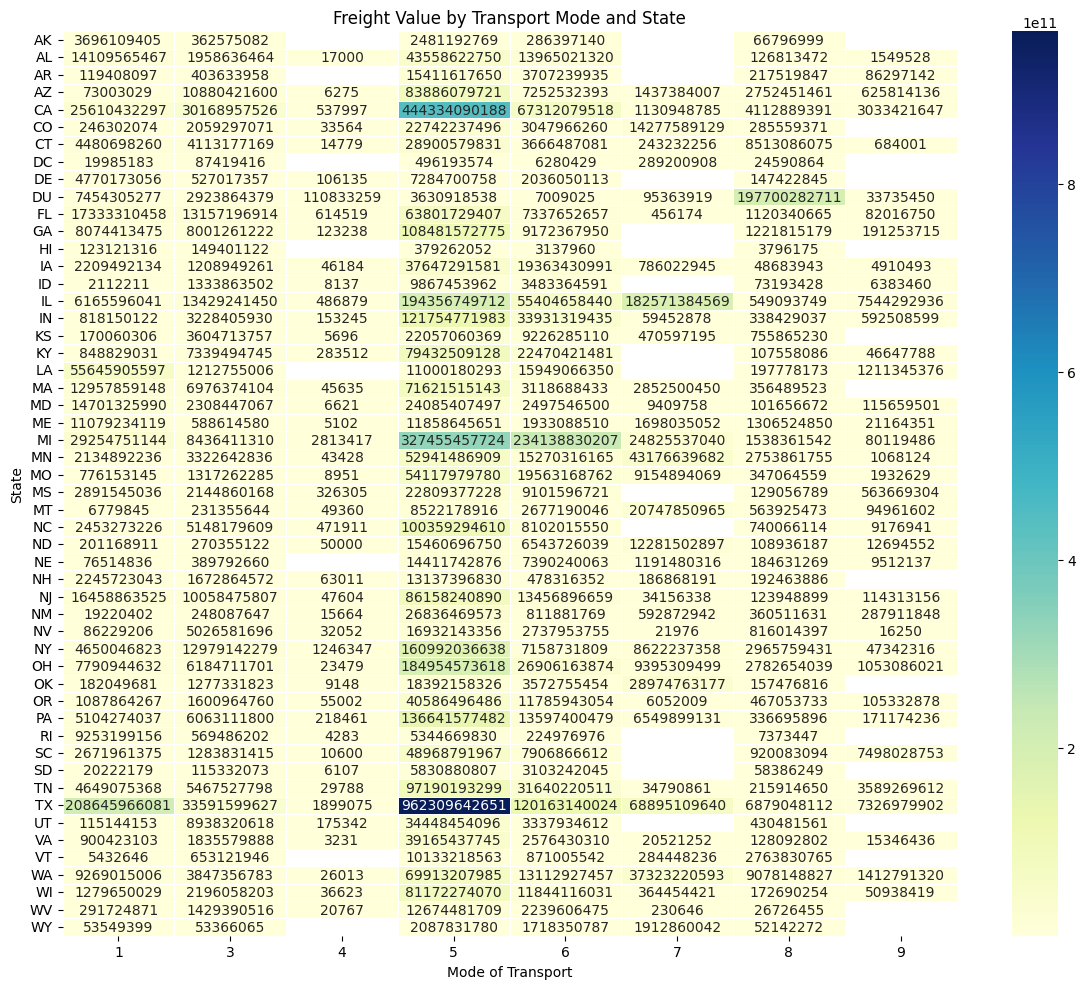

In [122]:
# Group by State and Transport Mode
regional_modes = df_dot2.groupby(['USASTATE', 'DISAGMOT'])['VALUE'].sum().reset_index()

# Pivot for heatmap
regional_pivot = regional_modes.pivot(index='USASTATE', columns='DISAGMOT', values='VALUE')

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(regional_pivot, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5)
plt.title("Freight Value by Transport Mode and State")
plt.ylabel("State")
plt.xlabel("Mode of Transport")
plt.tight_layout()
plt.show()

In [119]:
df_dot3.head()

,TRDTYPE,DEPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,PORT_ROUTE,TRADE_COST
0,1,0101,27,5,1220,3978,0,116,1.00,X,1,2020,0101 - 1220,4094
1,1,0101,28,5,1220,3614,0,71,1.00,X,1,2020,0101 - 1220,3685
2,1,0101,29,5,1220,12436,0,243,1.00,X,1,2020,0101 - 1220,12679
3,1,0101,29,5,1220,24764,0,485,2.00,X,1,2020,0101 - 1220,25249
4,1,0101,34,5,1220,33250,0,615,1.00,X,1,2020,0101 - 1220,33865


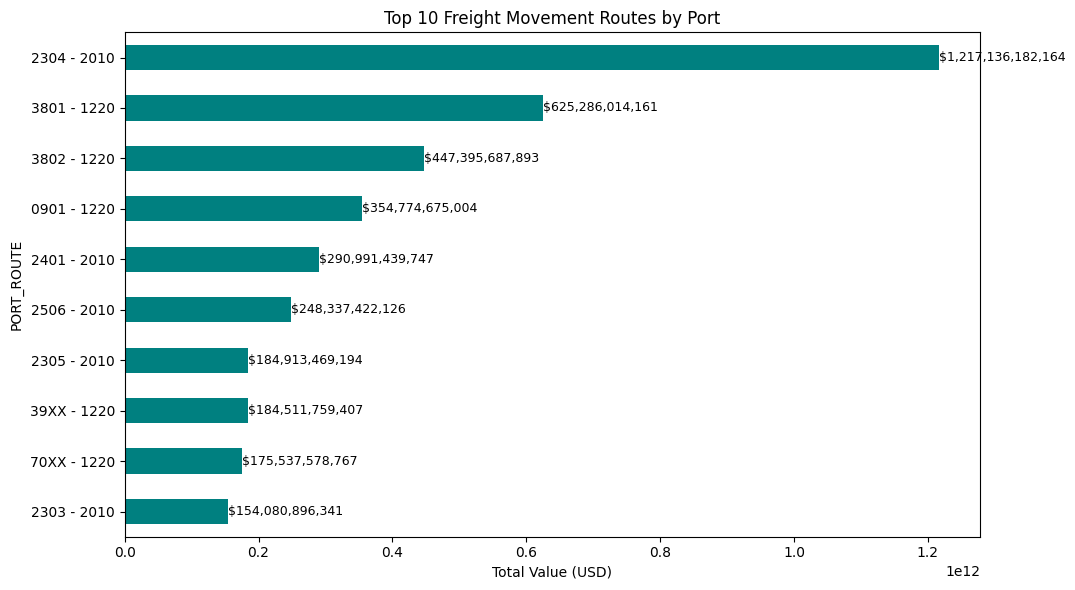

In [126]:
# Create new column for PORT_ROUTE
df_dot3['PORT_ROUTE'] = df_dot3['DEPE'].astype(str) + ' - ' + df_dot3['COUNTRY'].astype(str)
df_dot3['TRADE_COST'] = df_dot3['VALUE'] + df_dot3['FREIGHT_CHARGES']

# Top 10 busiest port routes by VALUE
top_routes = df_dot3.groupby('PORT_ROUTE')['TRADE_COST'].sum().sort_values(ascending=False).head(10)

# Plot
ax = top_routes.plot(kind='barh', figsize=(10, 6), color='teal')
plt.xlabel("Total Value (USD)")
plt.title("Top 10 Freight Movement Routes by Port")
plt.gca().invert_yaxis()
plt.tight_layout()

# Add data labels
for i, value in enumerate(top_routes.values):
    ax.text(value, i, f"${value:,.0f}", va='center', ha='left', fontsize=9)

plt.show()

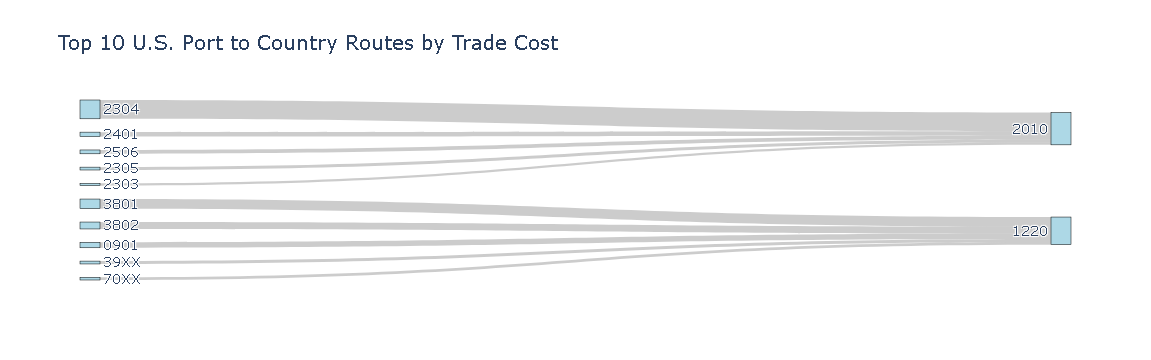

In [124]:
import pandas as pd
import plotly.graph_objects as go

# Create new column for PORT_ROUTE and TRADE_COST
df_dot3['PORT_ROUTE'] = df_dot3['DEPE'].astype(str) + ' - ' + df_dot3['COUNTRY'].astype(str)
df_dot3['TRADE_COST'] = df_dot3['VALUE'] + df_dot3['FREIGHT_CHARGES']

# Get top 10 PORT_ROUTE by trade cost
top_routes = df_dot3.groupby(['DEPE', 'COUNTRY'])['TRADE_COST'].sum().sort_values(ascending=False).head(10).reset_index()

# Unique nodes (Ports + Countries)
ports = top_routes['DEPE'].unique().tolist()
countries = top_routes['COUNTRY'].unique().tolist()
nodes = ports + countries

# Mapping node names to index
node_indices = {name: i for i, name in enumerate(nodes)}

# Sankey links
sources = top_routes['DEPE'].map(node_indices).tolist()
targets = top_routes['COUNTRY'].map(node_indices).tolist()
values = top_routes['TRADE_COST'].tolist()

# Build Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color="lightblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        label=[f"${v:,.0f}" for v in values],
    ))])

fig.update_layout(title_text="Top 10 U.S. Port to Country Routes by Trade Cost", font_size=14)
fig.show()

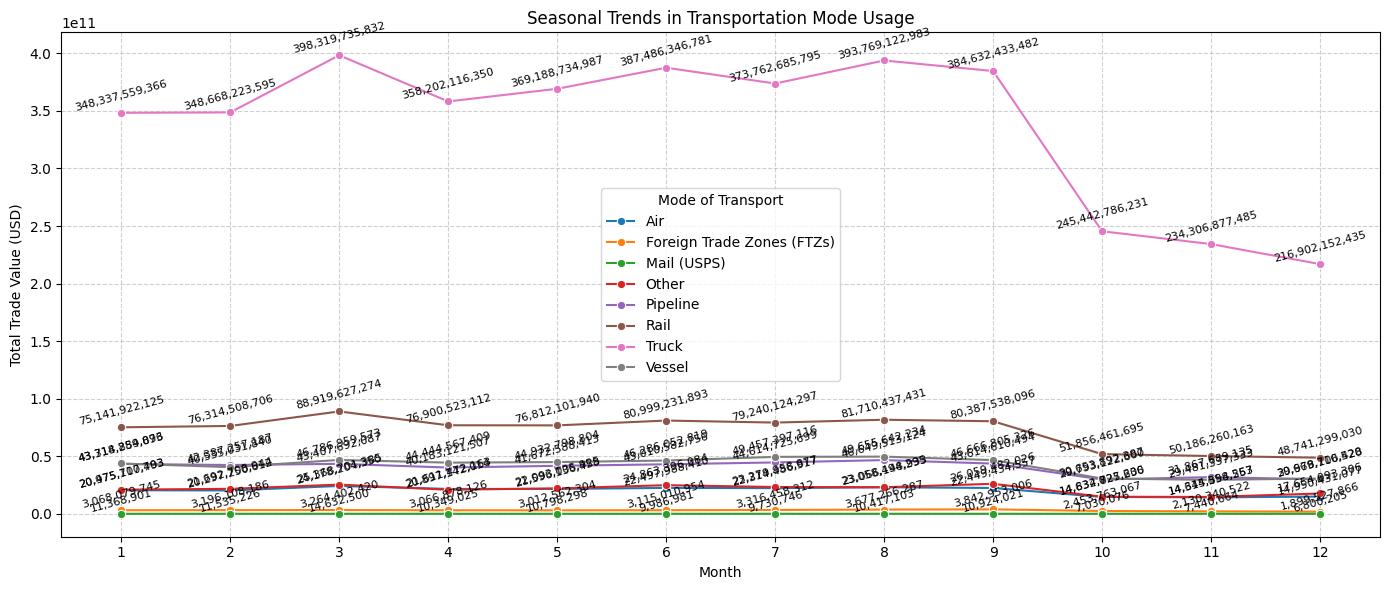

In [139]:
# Group by MONTH and DISAGMOT, sum total trade VALUE
monthly_mode_summary = df_dot1.groupby(['MONTH', 'DISAGMOT'])['VALUE'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
lineplot = sns.lineplot(data=monthly_mode_summary, x='MONTH', y='VALUE',
                        hue='DISAGMOT', marker='o', palette='tab10')

# Add data labels for each point
for mode in monthly_mode_summary['DISAGMOT'].unique():
    sub_df = monthly_mode_summary[monthly_mode_summary['DISAGMOT'] == mode]
    for i in range(len(sub_df)):
        month = sub_df.iloc[i]['MONTH']
        value = sub_df.iloc[i]['VALUE']
        plt.text(month, value, f'{value:,.0f}', fontsize=8,
                 ha='center', va='bottom', color='black', rotation=15)

# Final touches
plt.title("Seasonal Trends in Transportation Mode Usage")
plt.xlabel("Month")
plt.ylabel("Total Trade Value (USD)")
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Mode of Transport")
plt.tight_layout()
plt.show()

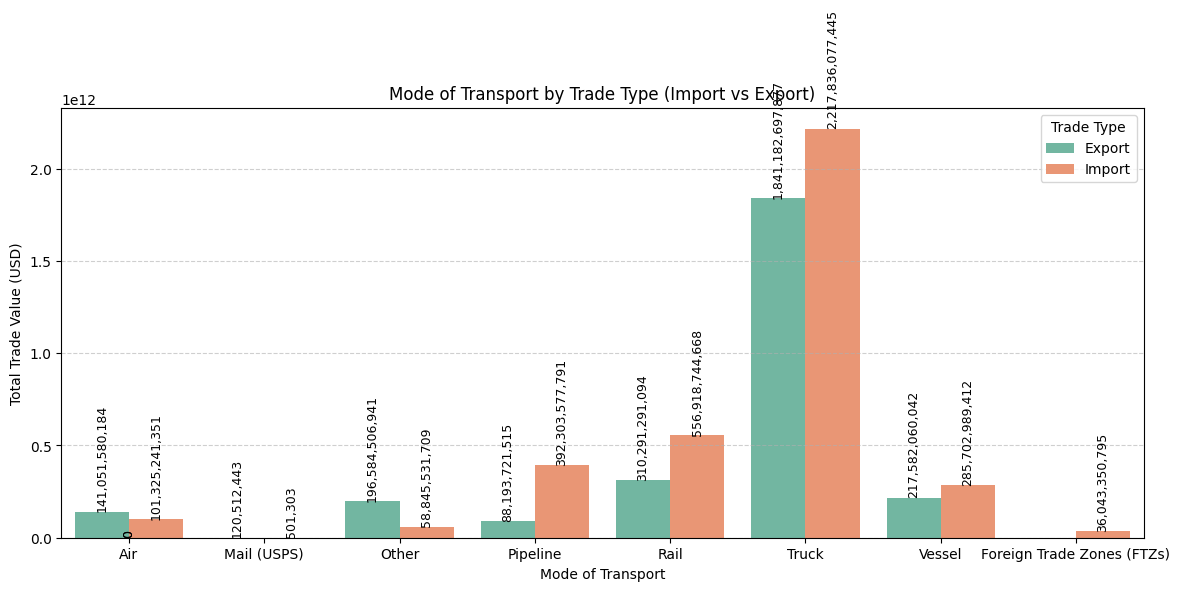

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by TRDTYPE and DISAGMOT, sum VALUE
trade_mode_split = df_dot1.groupby(['TRDTYPE', 'DISAGMOT'])['VALUE'].sum().reset_index()

# Replace TRDTYPE codes with readable labels
trade_mode_split['TRDTYPE'] = trade_mode_split['TRDTYPE'].replace({1: 'Export', 2: 'Import'})

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=trade_mode_split, x='DISAGMOT', y='VALUE', hue='TRDTYPE', palette='Set2')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.text(p.get_x() + p.get_width() / 2,
                height,
                f'{height:,.0f}',
                ha='center', va='bottom',
                fontsize=9, color='black',rotation=90)

# Final touches
plt.title("Mode of Transport by Trade Type (Import vs Export)")
plt.xlabel("Mode of Transport")
plt.ylabel("Total Trade Value (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Trade Type')
plt.tight_layout()
plt.show()

## IDENTIFY OPERATIONAL INNEFICIENCIES
**Investigate Areas of Operational Inefficiency**

### **-How much freight cost is incurred per dollar of trade value moved?**
On average, $0.05 - $0.08 of freight cost is incurred for every $1 of trade value moved, based on aggregate analysis across all transport modes.”

**NOTE**---If freight charges are high but value moved is low, it may signal inefficiency or over-reliance on that mode.


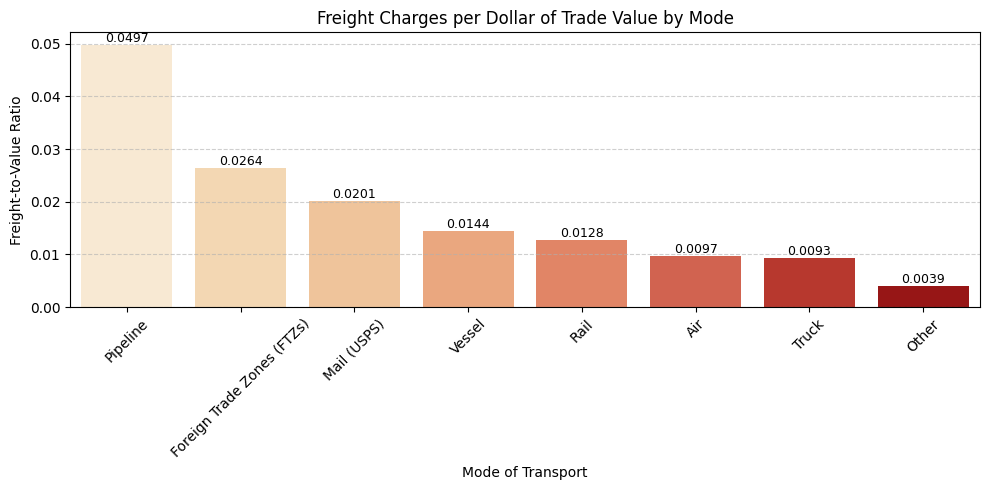

In [191]:
# Calculate efficiency
mode_efficiency = df_dot1.groupby('DISAGMOT')[['VALUE', 'FREIGHT_CHARGES']].sum().reset_index()
mode_efficiency['Freight_to_Value_Ratio'] = mode_efficiency['FREIGHT_CHARGES'] / mode_efficiency['VALUE']

# Sort for better visual ranking
mode_efficiency.sort_values('Freight_to_Value_Ratio', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=mode_efficiency, x='DISAGMOT', y='Freight_to_Value_Ratio', palette='OrRd')

# Add data labels on each bar
for bar in ax.patches:
    height = bar.get_height()
    if not pd.isna(height):
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9, color='black')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Final touches
plt.title("Freight Charges per Dollar of Trade Value by Mode")
plt.ylabel("Freight-to-Value Ratio")
plt.xlabel("Mode of Transport")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

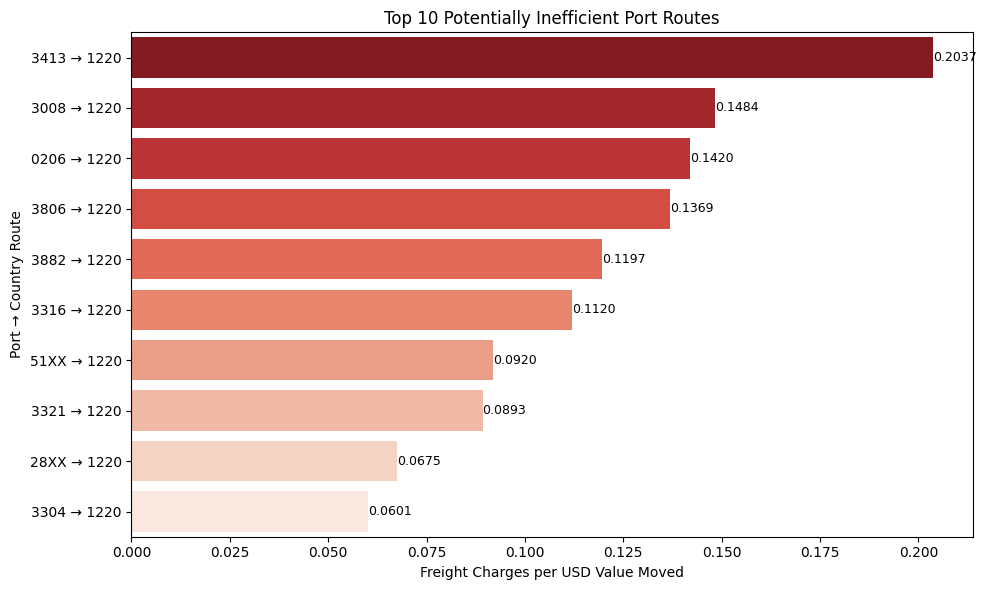

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_inefficient_routes,
                 x='Freight_to_Value',
                 y='PORT_ROUTE',
                 palette='Reds_r')

# Add data labels
for bar in ax.patches:
    width = bar.get_width()
    if not pd.isna(width):
        ax.text(width, bar.get_y() + bar.get_height() / 2,
                f'{width:.4f}',
                ha='left', va='center',
                fontsize=9, color='black')

# Final touches
plt.title("Top 10 Potentially Inefficient Port Routes")
plt.xlabel("Freight Charges per USD Value Moved")
plt.ylabel("Port → Country Route")
plt.tight_layout()
plt.show()

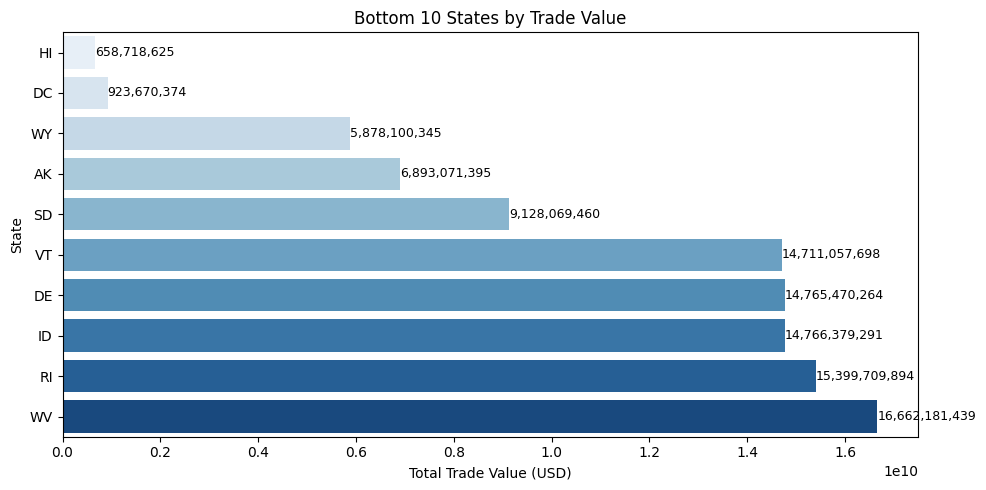

In [194]:
# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=low_util_states, x='VALUE', y='USASTATE', palette='Blues')

# Add data labels
for bar in ax.patches:
    width = bar.get_width()
    if not pd.isna(width):
        ax.text(width,
                bar.get_y() + bar.get_height() / 2,
                f'{width:,.0f}',  # format as thousands separator
                ha='left', va='center',
                fontsize=9, color='black')

# Final touches
plt.title("Bottom 10 States by Trade Value")
plt.xlabel("Total Trade Value (USD)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

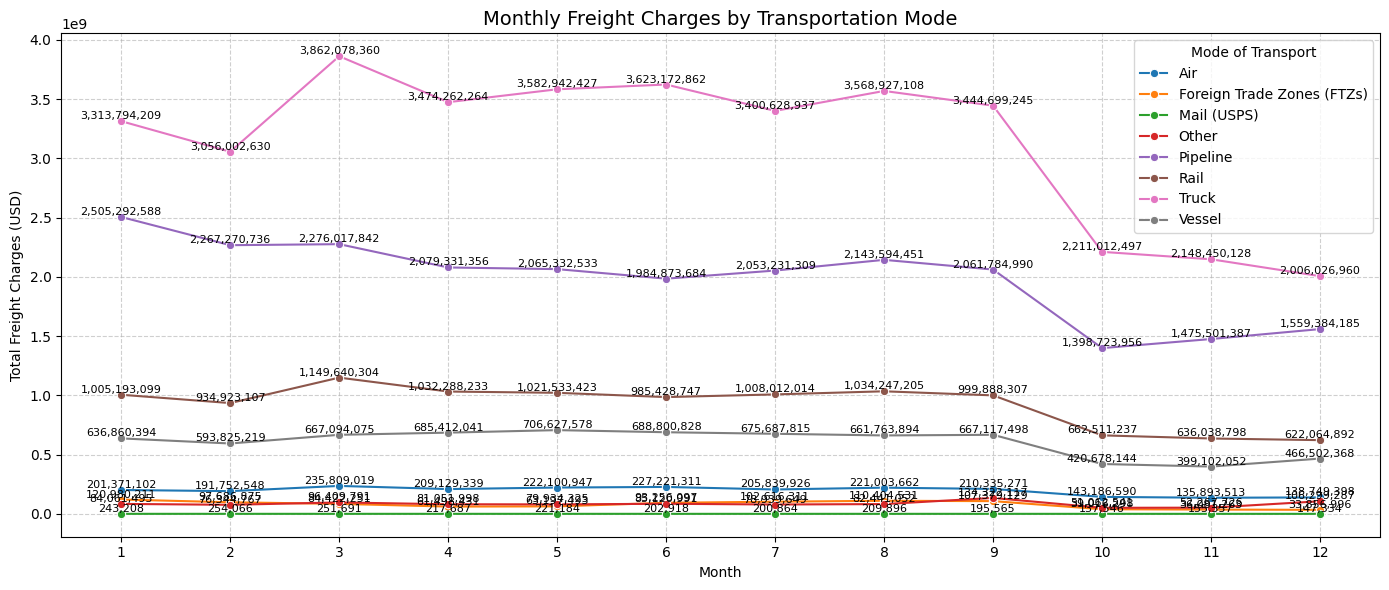

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by MONTH and DISAGMOT to sum FREIGHT_CHARGES
monthly_stress = df_dot1.groupby(['MONTH', 'DISAGMOT'])['FREIGHT_CHARGES'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(14, 6))
lineplot = sns.lineplot(data=monthly_stress, x='MONTH', y='FREIGHT_CHARGES',
                        hue='DISAGMOT', marker='o', palette='tab10')

# Add data labels
for mode in monthly_stress['DISAGMOT'].unique():
    mode_df = monthly_stress[monthly_stress['DISAGMOT'] == mode]
    for i in range(len(mode_df)):
        month = mode_df.iloc[i]['MONTH']
        charges = mode_df.iloc[i]['FREIGHT_CHARGES']
        plt.text(month, charges, f'{charges:,.0f}', fontsize=8,
                 ha='center', va='bottom', color='black')

# Final touches
plt.title("Monthly Freight Charges by Transportation Mode", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Freight Charges (USD)")
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Mode of Transport")
plt.tight_layout()
plt.show()

### **How has the total trade value evolved from 2020 to 2024?**

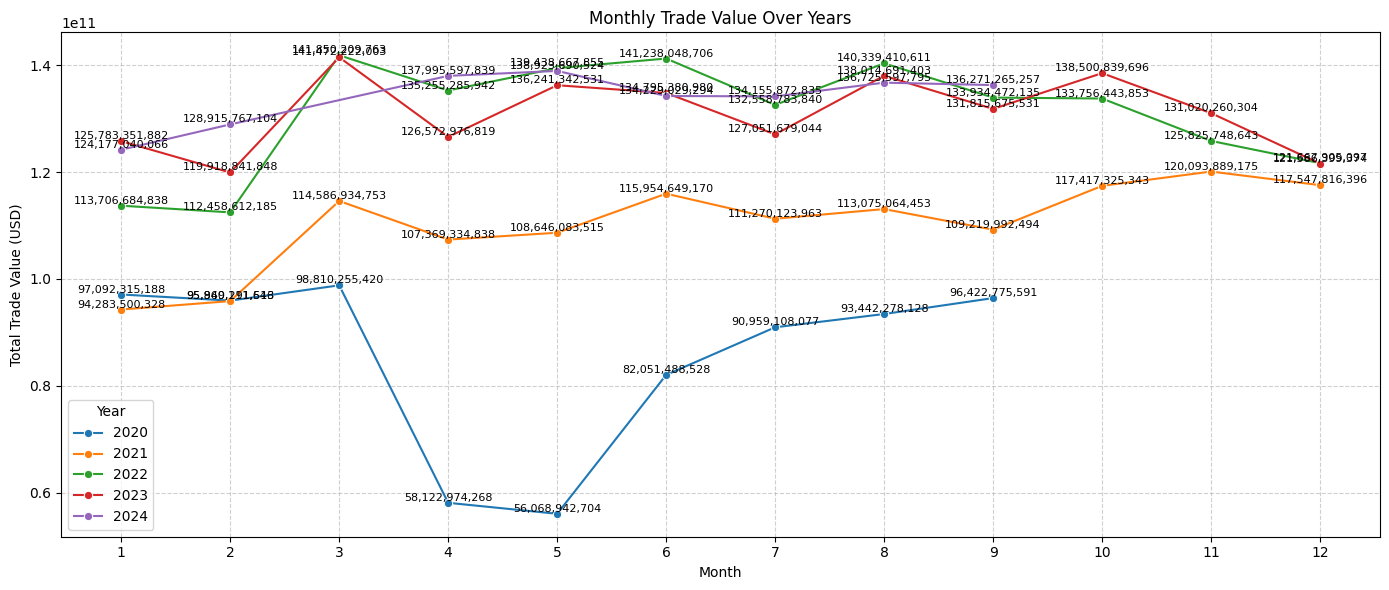

In [196]:
# Ensure MONTH is treated as ordered categorical (1–12)
month_order = list(range(1, 13))
monthly = df_dot3.groupby(['YEAR', 'MONTH'])['VALUE'].sum().reset_index()
monthly['MONTH'] = pd.Categorical(monthly['MONTH'], categories=month_order, ordered=True)

# Plot
plt.figure(figsize=(14, 6))
lineplot = sns.lineplot(data=monthly, x='MONTH', y='VALUE', hue='YEAR', marker='o', palette='tab10')

# Add data labels for each point
for year in monthly['YEAR'].unique():
    sub_df = monthly[monthly['YEAR'] == year]
    for i in range(len(sub_df)):
        m = sub_df.iloc[i]['MONTH']
        v = sub_df.iloc[i]['VALUE']
        if not pd.isna(v):
            plt.text(m, v, f'{v:,.0f}', fontsize=8, ha='center', va='bottom', color='black')

# Final touches
plt.title("Monthly Trade Value Over Years")
plt.xlabel("Month")
plt.ylabel("Total Trade Value (USD)")
plt.xticks(month_order)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

###	**Which mode of transportation dominates trade, and how has its share changed over time?**

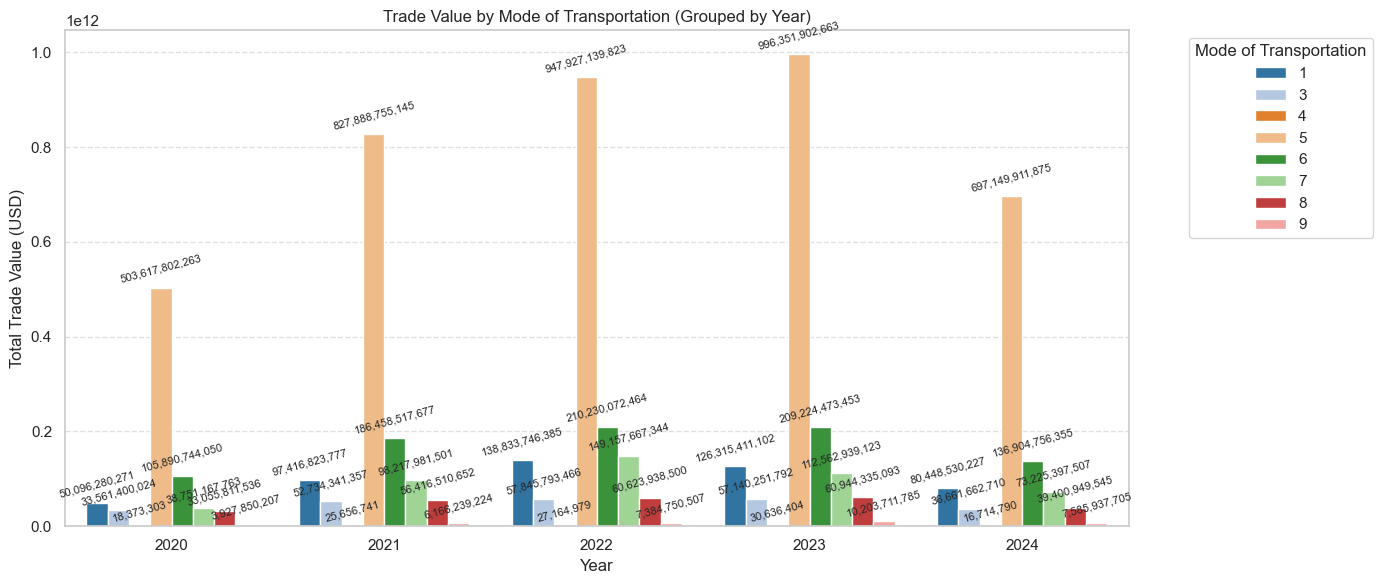

In [203]:
# Prepare the data
grouped = df_dot3.groupby(['YEAR', 'DISAGMOT'])['VALUE'].sum().reset_index()

# Optional: sort DISAGMOT for consistent plotting
grouped['DISAGMOT'] = grouped['DISAGMOT'].astype(str)  # Ensure it's categorical for plotting

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=grouped, x='YEAR', y='VALUE', hue='DISAGMOT', palette='tab20')

# Add data labels
for container in ax.containers:
    labels = [f'{int(v.get_height()):,}' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=8, padding=2, rotation=15)

# Final touches
plt.title("Trade Value by Mode of Transportation (Grouped by Year)")
plt.xlabel("Year")
plt.ylabel("Total Trade Value (USD)")
plt.legend(title="Mode of Transportation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **Which U.S. ports (by state or code) handle the most freight, and what are the bottlenecks?**

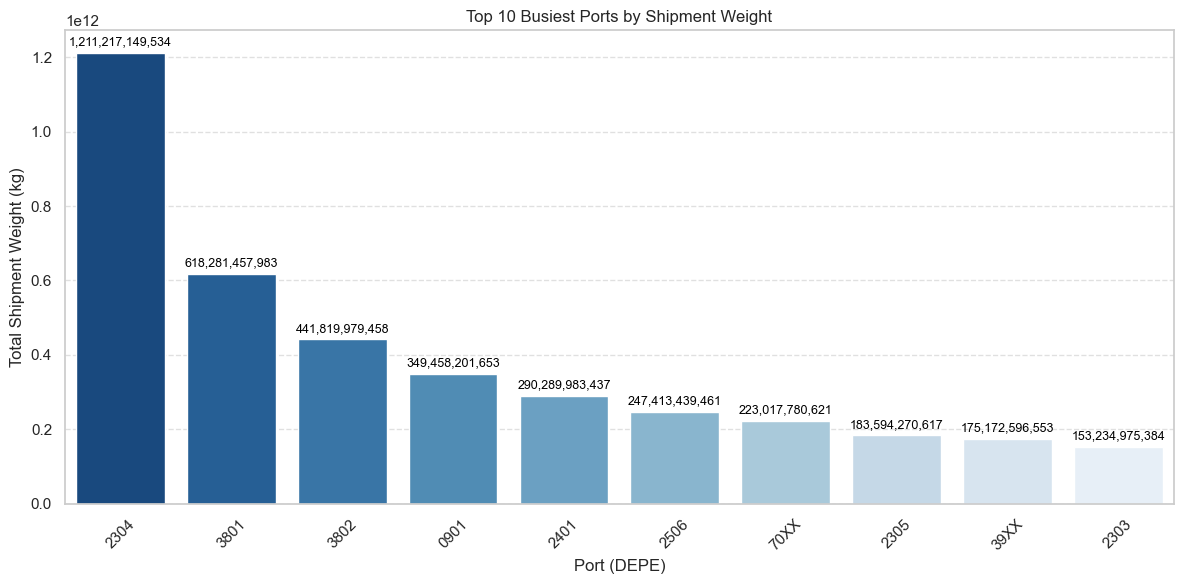

In [206]:
# Get top 10 ports by total shipment weight
port = df_dot3.groupby("DEPE")["VALUE"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=port.index, y=port.values, palette="Blues_r")

# Add value labels above bars
for i, v in enumerate(port.values):
    ax.text(i, v + port.values.max()*0.01, f'{v:,.0f}', ha='center', va='bottom', fontsize=9, color='black')

# Final touches
plt.xticks(rotation=45)
plt.title("Top 10 Busiest Ports by Shipment Weight")
plt.xlabel("Port (DEPE)")
plt.ylabel("Total Shipment Weight (kg)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **Is there any seasonal pattern in freight movement (e.g., more trade in Q4)?**

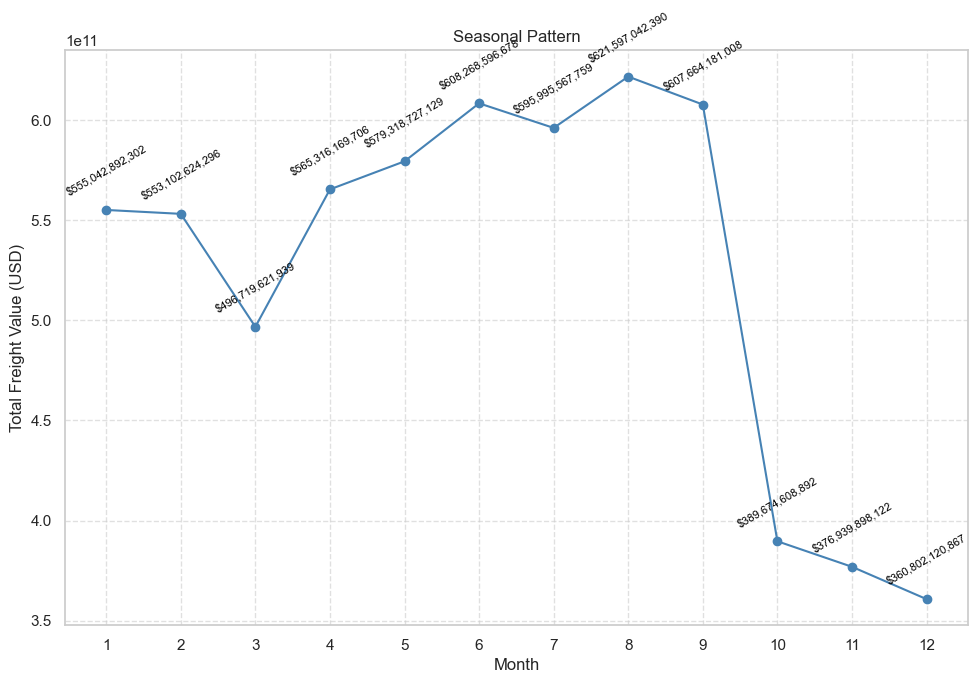

In [219]:
# Prepare monthly totals
monthly = df_dot3.groupby('MONTH')['VALUE'].sum().reset_index()

# Sort MONTH as ordered categorical (1–12)
month_order = list(range(1, 13))
monthly['MONTH'] = pd.Categorical(monthly['MONTH'], categories=month_order, ordered=True)
monthly = monthly.sort_values('MONTH')

# Plot
plt.figure(figsize=(10, 7))
plt.plot(monthly['MONTH'], monthly['VALUE'], marker='o', color='steelblue')
plt.title('Seasonal Pattern')
plt.xlabel('Month')
plt.ylabel('Total Freight Value (USD)')
plt.xticks(month_order)

# Add data labels
for i in range(len(monthly)):
    m = monthly.iloc[i]['MONTH']
    v = monthly.iloc[i]['VALUE']
    if pd.notna(v):
        plt.text(m, v + monthly['VALUE'].max() * 0.01, f'${v:,.0f}', ha='center', va='bottom', fontsize=8, color='black', rotation=30)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **How much does each mode contribute to economic productivity across regions (e.g., by border state)?**

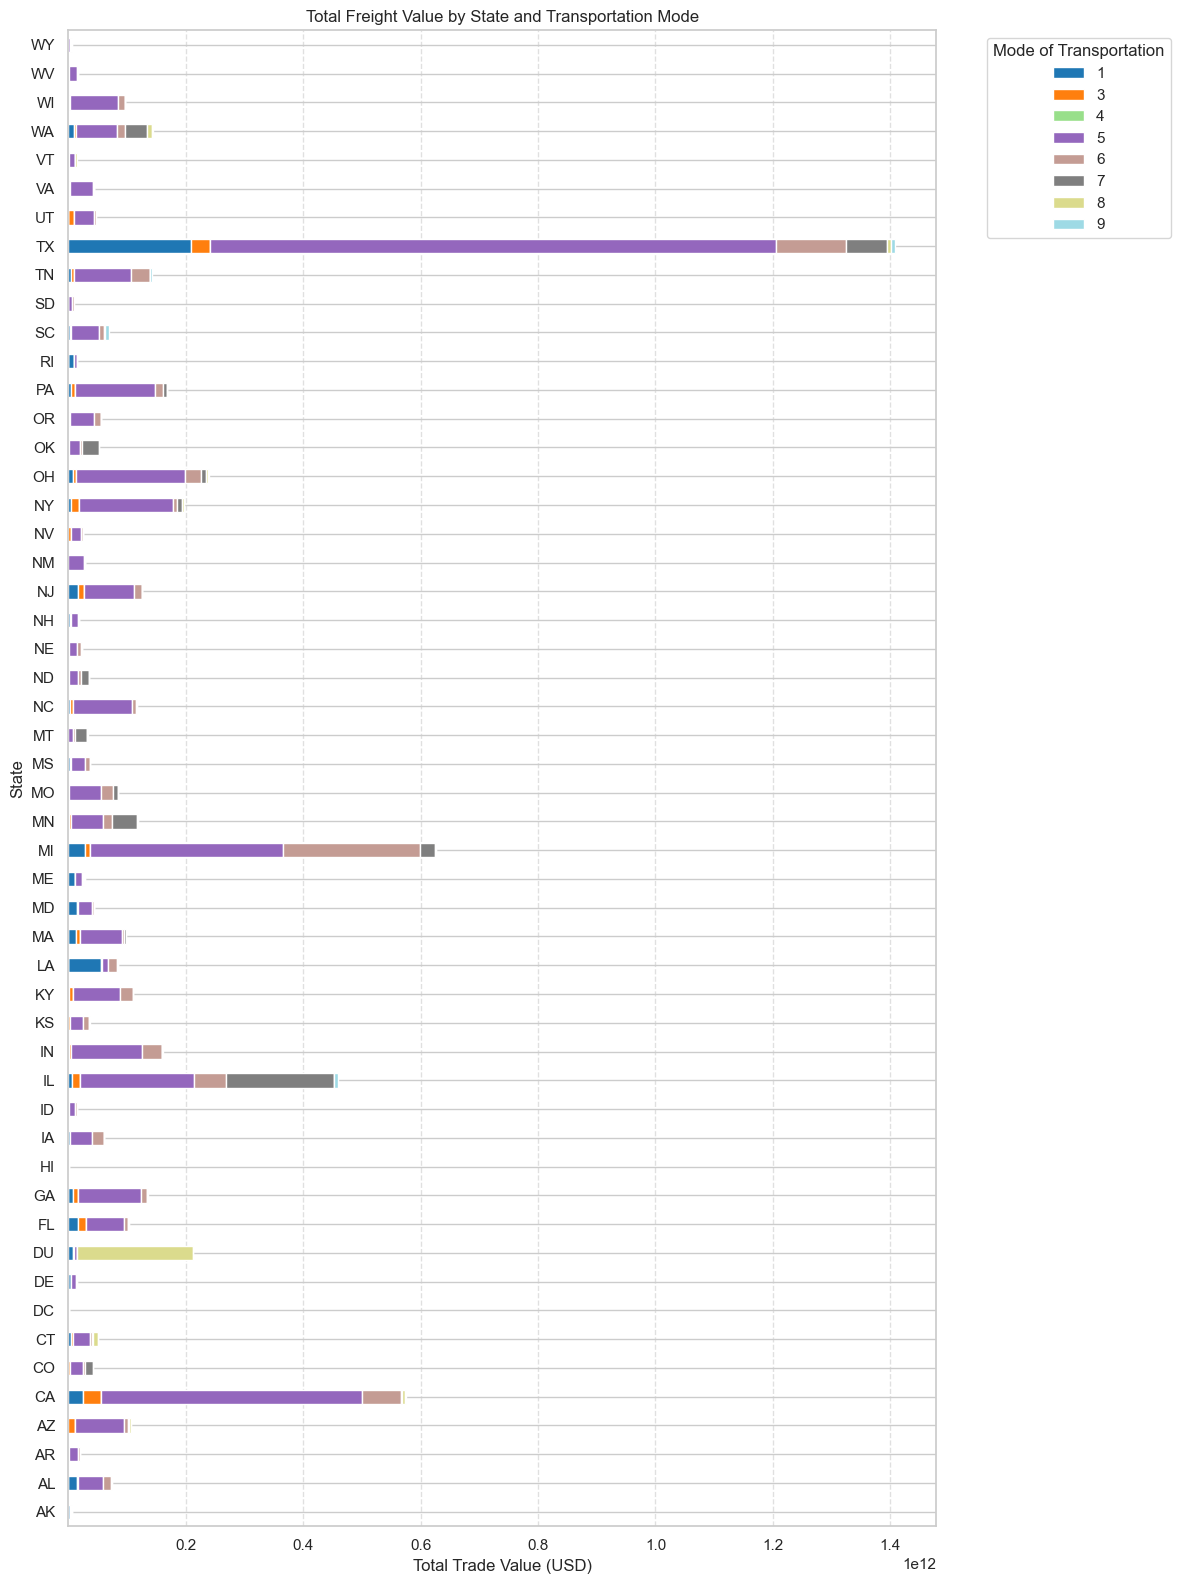

In [226]:
# Transpose data for horizontal layout
stacked_df = df_dot2.groupby(['USASTATE', 'DISAGMOT'])['VALUE'].sum().unstack()

# Plot horizontally
ax = stacked_df.plot(kind='barh', stacked=True, figsize=(12, 16), colormap='tab20')

# Final polish
plt.title("Total Freight Value by State and Transportation Mode")
plt.xlabel("Total Trade Value (USD)")
plt.ylabel("State")
plt.legend(title="Mode of Transportation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **What are the top 10 U.S. states (USASTATE) by total freight value?**

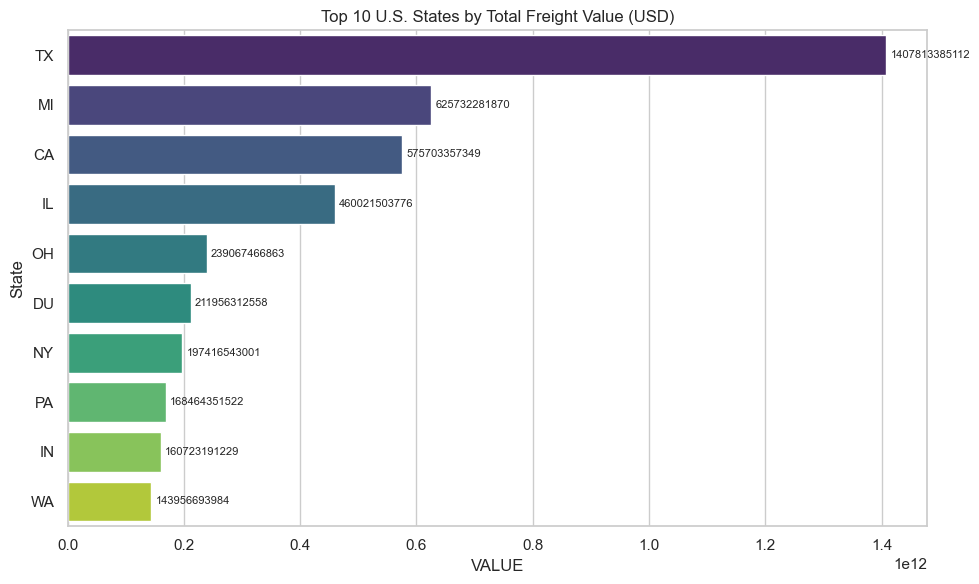

In [234]:
# Define top_states before plotting
top_states = df_dot2.groupby('USASTATE')['VALUE'].sum().nlargest(10).reset_index()

# Now plot with labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_states, x='VALUE', y='USASTATE', palette='viridis')

# Add data labels
for container in ax.containers:
    ax.bar_label(container,
                 fmt='%.0f', 
                 label_type='edge', 
                 fontsize=8,
                 padding=3)

plt.title('Top 10 U.S. States by Total Freight Value (USD)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


### **How has the total freight value changed over time?**

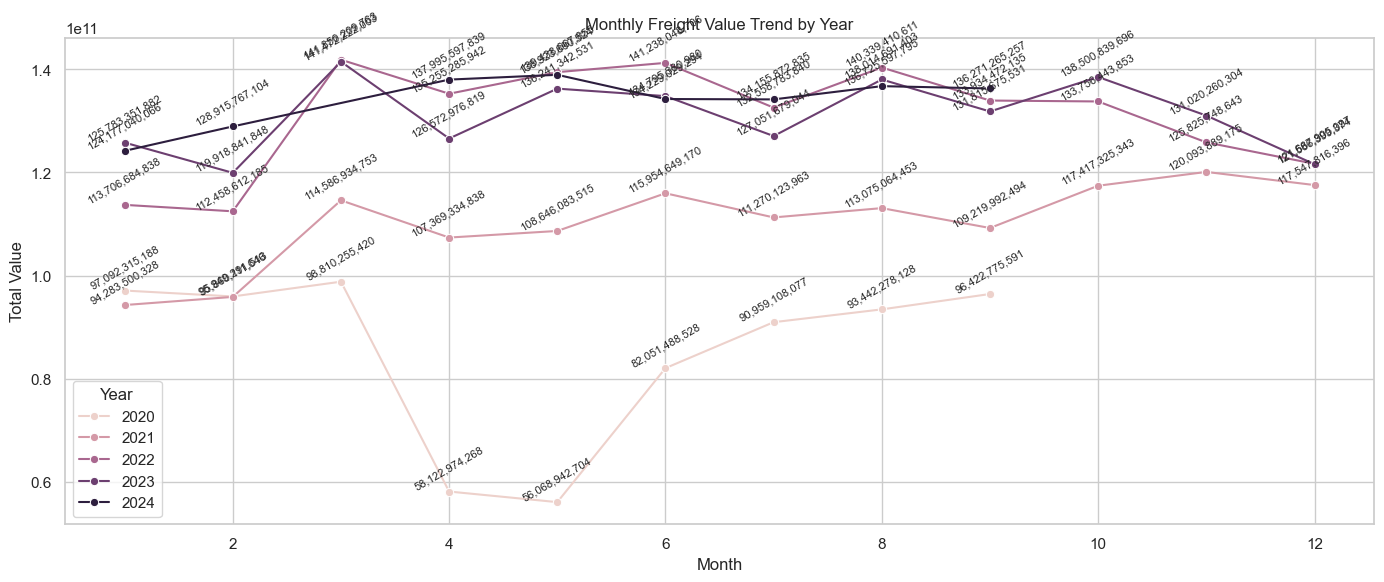

In [238]:
# Define the value_trend DataFrame
value_trend = df_dot3.groupby(['YEAR', 'MONTH'])['VALUE'].sum().reset_index()

# Plot with data labels
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=value_trend, x='MONTH', y='VALUE', hue='YEAR', marker="o")

# Add labels to each point
for line in ax.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        if not pd.isna(y):
            ax.text(x, y,
                    f'{y:,.0f}',
                    fontsize=8,
                    rotation=30,
                    ha='center',
                    va='bottom')

plt.title('Monthly Freight Value Trend by Year')
plt.xlabel('Month')
plt.ylabel('Total Value')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


### **What commodities (COMMODITY2) contribute the most to freight value?**

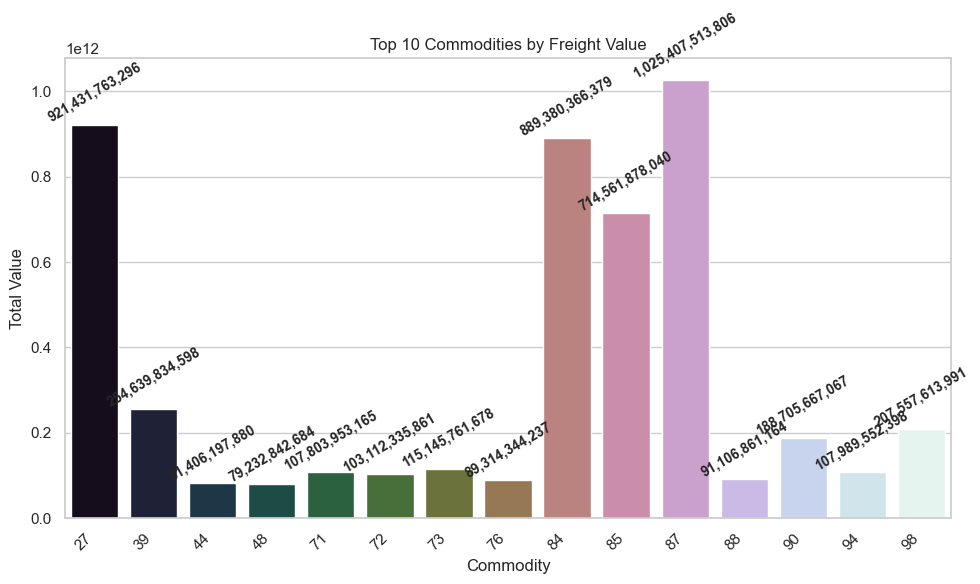

In [247]:
# Group and get top 10 commodities 
top_commodities = df_dot2.groupby('COMMODITY2')['VALUE'].sum().nlargest(15).reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_commodities, x='COMMODITY2', y='VALUE', palette='cubehelix')

# Add rotated data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height,
            f'{height:,.0f}',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold',
            rotation=30)  # Rotate label text

# Set title and labels
plt.title('Top 10 Commodities by Freight Value')
plt.xlabel('Commodity')
plt.ylabel('Total Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis tick labels
plt.tight_layout()
plt.show()

### **Which country is the biggest trade partners based on freight value?**
2010 - Mexico

1220 - Canada

Mexico is the biggest trade partner

In [327]:
# Standardize country names if needed
country_map = {
    'Canada': '1220',
    'Mexico': '2010'
    # Add more mappings if necessary
}
df_dot3['COUNTRY'] = df_dot3['COUNTRY'].replace(country_map)

# Group by country and sum freight value
country_totals = df_dot3.groupby('COUNTRY')['VALUE'].sum()

# Get the top country by freight value
top_trade_partner = country_totals.idxmax()
top_value = country_totals.max()

# Display result
print(f"Top Trade Partner: {top_trade_partner}, Total Freight Value: ${top_value:,.0f}")

Top Trade Partner: 1220, Total Freight Value: $3,743,616,252,777


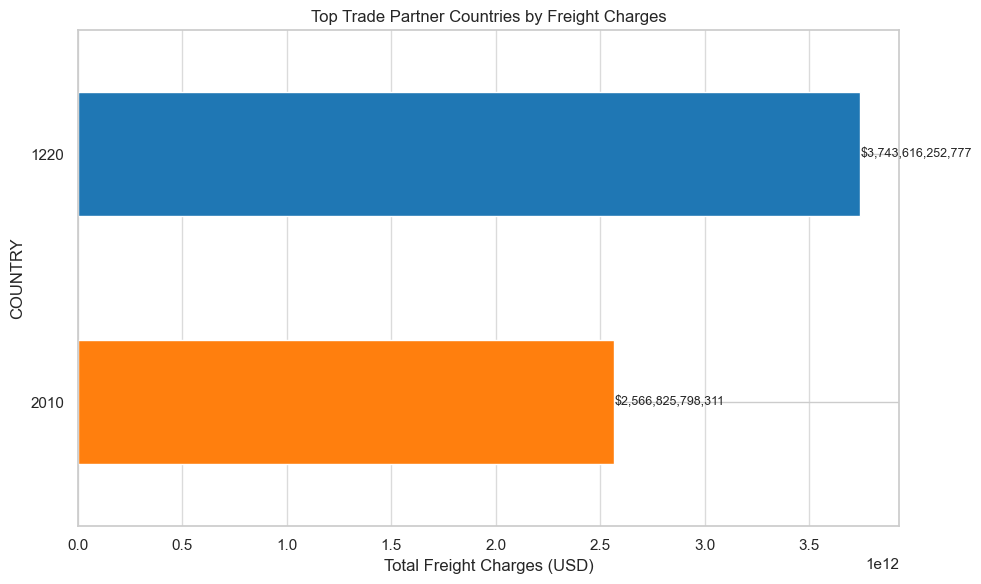

In [345]:
top_countries_freight = (
    df_dot3.groupby('COUNTRY')['VALUE']
    .sum()
    .sort_values(ascending=False)

)

# Define a list of distinct colors (length must match number of bars)
colors = plt.cm.tab10.colors[:len(top_countries_freight)]  # or use any colormap like 'Set3', 'Paired'

# Plot
plt.figure(figsize=(10, 6))
ax = top_countries_freight.plot(kind='barh', color=colors)

# Add data labels
for i, value in enumerate(top_countries_freight.values):
    ax.text(value, i, f"${value:,.0f}", va='center', ha='left', fontsize=9)

# Customize plot
plt.xlabel("Total Freight Charges (USD)")
plt.title("Top Trade Partner Countries by Freight Charges")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(axis='x', alpha=0.7)

plt.show()

### **What is the trend of freight weight (SHIPWT) vs value (VALUE) over the years?**

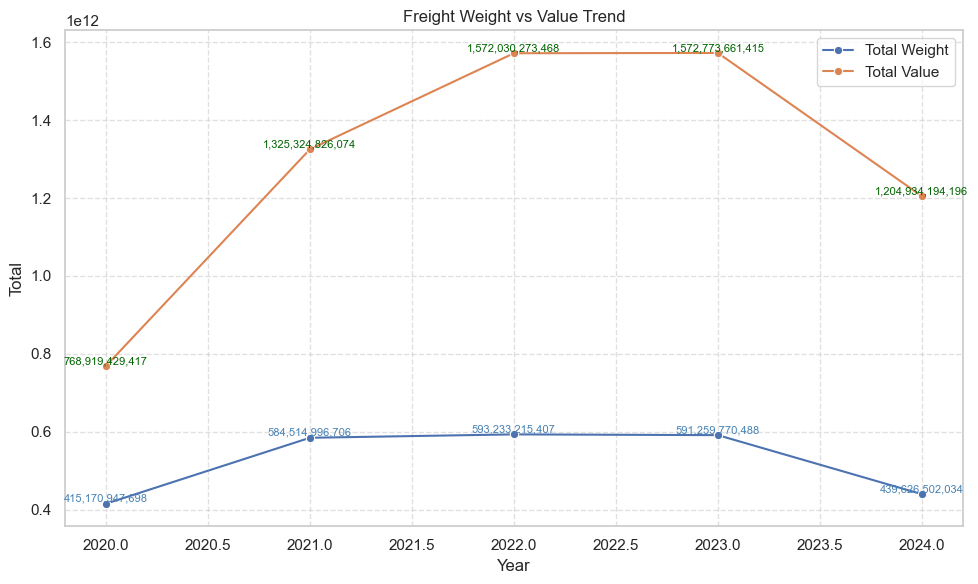

In [276]:
trend_df = df_dot1.groupby('YEAR')[['SHIPWT', 'VALUE']].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=trend_df, x='YEAR', y='SHIPWT', marker='o', label='Total Weight')
sns.lineplot(data=trend_df, x='YEAR', y='VALUE', marker='o', label='Total Value', ax=ax)

# Add data labels
for i in range(len(trend_df)):
    x = trend_df.loc[i, 'YEAR']
    wt = trend_df.loc[i, 'SHIPWT']
    val = trend_df.loc[i, 'VALUE']
    
    if pd.notna(wt):
        ax.text(x, wt, f'{wt:,.0f}', ha='center', va='bottom', fontsize=8, color='steelblue')
    if pd.notna(val):
        ax.text(x, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=8, color='darkgreen')

# Final touches
plt.title('Freight Weight vs Value Trend')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **Which modes or routes are least environmentally friendly?**

In [302]:
mode_efficiency = df_dot1.groupby('DISAGMOT')[['SHIPWT', 'VALUE', 'FREIGHT_CHARGES']].sum().reset_index()
mode_efficiency['Value_per_kg'] = mode_efficiency['VALUE'] / mode_efficiency['SHIPWT']
mode_efficiency['FreightCharge_per_kg'] = mode_efficiency['FREIGHT_CHARGES'] / mode_efficiency['SHIPWT']

# Sort by freight charge per kg as proxy for inefficiency
mode_efficiency.sort_values(by='FreightCharge_per_kg', ascending=False)

,DISAGMOT,SHIPWT,VALUE,FREIGHT_CHARGES,Value_per_kg,FreightCharge_per_kg
2,4,7076,118546217,2393949,16753.28,338.32
1,3,1457365083,237943449349,2298522790,163.27,1.58
6,8,1067424884,250441545326,994129553,234.62,0.93
3,5,513241051884,3972935511769,36909624871,7.74,0.07
7,9,22514069159,35268489428,938006618,1.57,0.04
5,7,781828079731,471915153238,23436975009,0.60,0.03
4,6,407839282181,848708563999,10855398194,2.08,0.03
0,1,847739305435,493110791762,7127192448,0.58,0.01


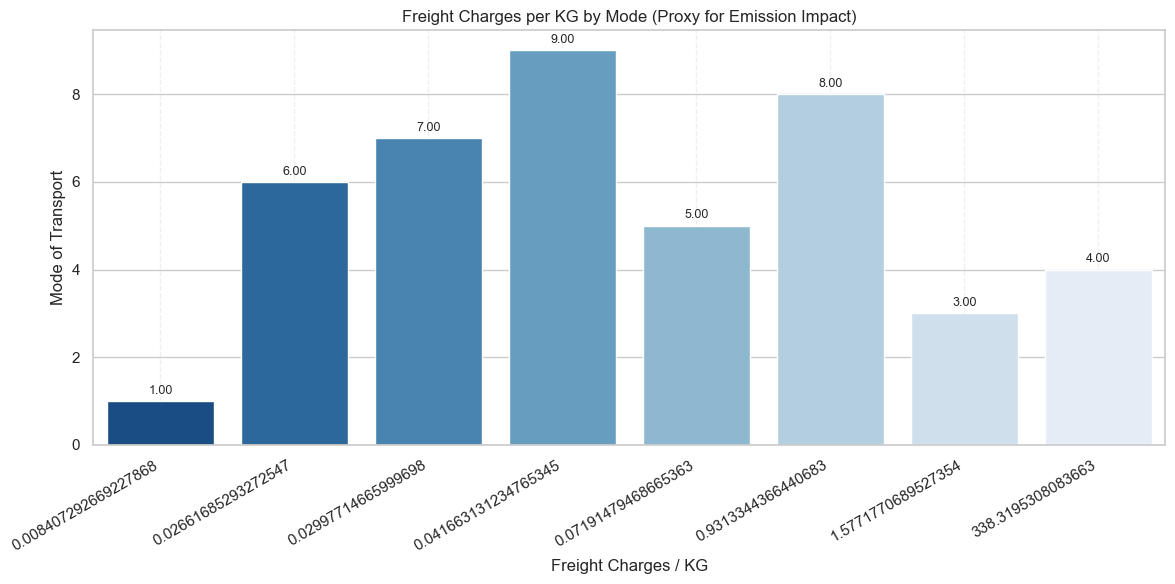

In [306]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=mode_efficiency,
    x='FreightCharge_per_kg',
    y='DISAGMOT',
    palette='Blues_r'
)

# Add data labels
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f',               # Two decimal places
        label_type='edge', 
        fontsize=9,
        padding=3
    )

# Rotate x-axis labels
plt.xticks(rotation=30, ha='right')

# Final styling
plt.title('Freight Charges per KG by Mode (Proxy for Emission Impact)')
plt.xlabel('Freight Charges / KG')
plt.ylabel('Mode of Transport')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [312]:
df_dot3.head()

,TRDTYPE,DEPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,PORT_ROUTE,TRADE_COST
0,1,0101,27,5,2010,3978,0,116,1.00,X,1,2020,0101 → 1220,4094
1,1,0101,28,5,2010,3614,0,71,1.00,X,1,2020,0101 → 1220,3685
2,1,0101,29,5,1220,12436,0,243,1.00,X,1,2020,0101 → 1220,12679
3,1,0101,29,5,1220,24764,0,485,2.00,X,1,2020,0101 → 1220,25249
4,1,0101,34,5,1220,33250,0,615,1.00,X,1,2020,0101 → 1220,33865


Top 15 Least Environmentally Friendly Mode-Route Combinations:


,ROUTE,DISAGMOT,SHIPWT,FREIGHT_CHARGES,Emission_Score,FreightCharge_per_kg,Impact_Score
115,DU → 1220,Other,1421560,887759396,3.00,624.50,1873.49
436,NJ → 2010,Other,1818,115086,3.00,63.30,189.91
237,KY → 1220,Other,26064,1062707,3.00,40.77,122.32
629,VA → 2010,Other,2141,69172,3.00,32.31,96.92
157,HI → 1220,Other,3338,104496,3.00,31.30,93.91
326,MN → 2010,Other,718,21917,3.00,30.53,91.58
421,NH → 2010,Other,140,3345,3.00,23.89,71.68
661,WI → 1220,Other,61585,1454349,3.00,23.62,70.85
388,ND → 1220,Other,33485,626151,3.00,18.70,56.10
97,DC → 2010,Other,56,1000,3.00,17.86,53.57


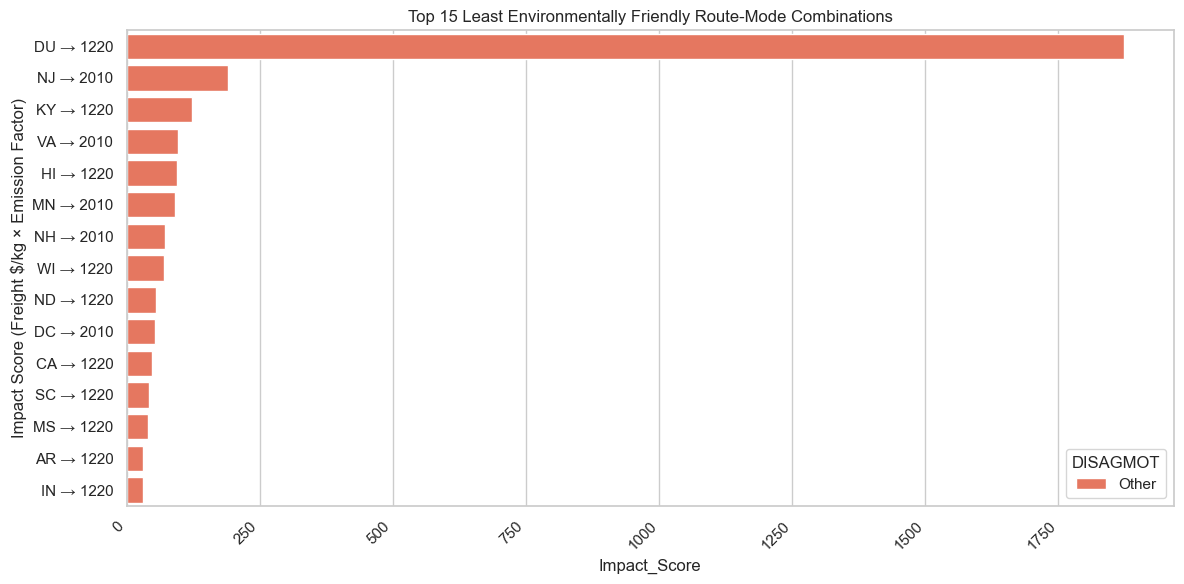

In [318]:
# 1. Create ROUTE column
df_dot1['ROUTE'] = df_dot1['USASTATE'].astype(str) + ' → ' + df_dot1['COUNTRY'].astype(str)

# 2. Define Emission Scores for each mode (higher = worse for environment)
emission_scores = {
    'Air': 5,
    'Truck': 4,
    'Other': 3,
    'Rail': 2,
    'Pipeline': 1,
    'Vessel': 2
}

# 3. Assign emission score
df_dot1['Emission_Score'] = df_dot1['DISAGMOT'].map(emission_scores)

# 4. Group by route and mode
route_mode_summary = df_dot1.groupby(['ROUTE', 'DISAGMOT']).agg({
    'SHIPWT': 'sum',
    'FREIGHT_CHARGES': 'sum',
    'Emission_Score': 'mean'
}).reset_index()

# Remove rows with SHIPWT = 0 or NaN
route_mode_summary = route_mode_summary[route_mode_summary['SHIPWT'] > 0]

# 5. Calculate proxy impact: (Freight Charge per KG * Emission Score)
route_mode_summary['FreightCharge_per_kg'] = route_mode_summary['FREIGHT_CHARGES'] / route_mode_summary['SHIPWT']
route_mode_summary['Impact_Score'] = route_mode_summary['FreightCharge_per_kg'] * route_mode_summary['Emission_Score']

# 6. Get Top 15 worst combinations
top_routes = route_mode_summary.sort_values(by='Impact_Score', ascending=False).head(15)

# 7. Display and visualize
print("Top 15 Least Environmentally Friendly Mode-Route Combinations:")
display(top_routes)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x='Impact_Score', y='ROUTE', hue='DISAGMOT', palette='Reds')
plt.title('Top 15 Least Environmentally Friendly Route-Mode Combinations')
plt.ylabel('Impact Score (Freight $/kg × Emission Factor)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Least Environmentally Friendly 'Truck' Routes:


,ROUTE,DISAGMOT,SHIPWT,FREIGHT_CHARGES,Emission_Score,FreightCharge_per_kg,Impact_Score
1,AK → 2010,Truck,6855175,2327917,4.00,0.34,1.36
2,AL → 1220,Truck,1500770962,403957533,4.00,0.27,1.08
18,DU → 1220,Truck,106053885,24715044,4.00,0.23,0.93
52,MS → 1220,Truck,757574714,172078855,4.00,0.23,0.91
38,LA → 1220,Truck,615897147,131812108,4.00,0.21,0.86
4,AR → 1220,Truck,801811877,160329683,4.00,0.20,0.80
86,TN → 1220,Truck,3080061926,604156016,4.00,0.20,0.78
56,NC → 1220,Truck,3675101280,701114781,4.00,0.19,0.76
82,SC → 1220,Truck,2414345147,450453723,4.00,0.19,0.75
88,TX → 1220,Truck,8659375234,1607761597,4.00,0.19,0.74


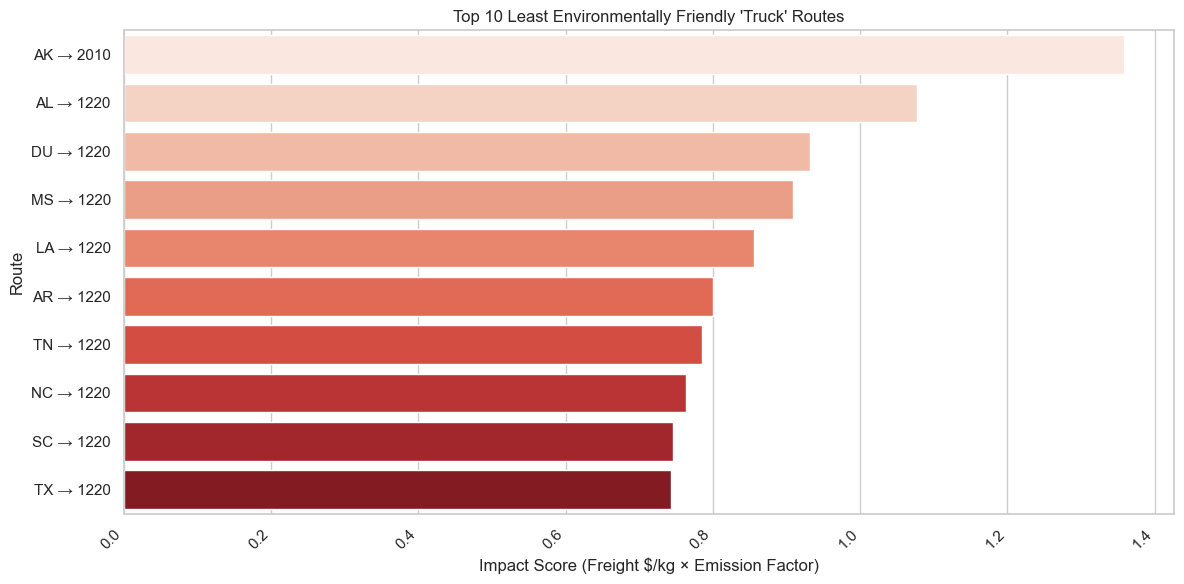

In [320]:
# 1. Create ROUTE column
df_dot1['ROUTE'] = df_dot1['USASTATE'].astype(str) + ' → ' + df_dot1['COUNTRY'].astype(str)

# 2. Define Emission Scores for each mode (higher = worse for environment)
emission_scores = {
    'Air': 5,
    'Truck': 4,
    'Other': 3,
    'Rail': 2,
    'Pipeline': 1,
    'Vessel': 2
}

# 3. Assign emission score
df_dot1['Emission_Score'] = df_dot1['DISAGMOT'].map(emission_scores)

# 3.1 Filter for a specific mode of transport — e.g., 'Truck'
filtered_df = df_dot1[df_dot1['DISAGMOT'] == 'Truck']

# 4. Group by route (only for that DISAGMOT)
route_mode_summary = filtered_df.groupby(['ROUTE', 'DISAGMOT']).agg({
    'SHIPWT': 'sum',
    'FREIGHT_CHARGES': 'sum',
    'Emission_Score': 'mean'
}).reset_index()

# Remove rows with SHIPWT = 0 or NaN
route_mode_summary = route_mode_summary[route_mode_summary['SHIPWT'] > 0]

# 5. Calculate proxy impact
route_mode_summary['FreightCharge_per_kg'] = route_mode_summary['FREIGHT_CHARGES'] / route_mode_summary['SHIPWT']
route_mode_summary['Impact_Score'] = route_mode_summary['FreightCharge_per_kg'] * route_mode_summary['Emission_Score']

# 6. Get Top 10 worst Truck routes
top_routes = route_mode_summary.sort_values(by='Impact_Score', ascending=False).head(10)

# 7. Display and visualize
print("Top 10 Least Environmentally Friendly 'Truck' Routes:")
display(top_routes)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x='Impact_Score', y='ROUTE', palette='Reds')
plt.title("Top 10 Least Environmentally Friendly 'Truck' Routes")
plt.xlabel('Impact Score (Freight $/kg × Emission Factor)')
plt.ylabel('Route')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [323]:
df_dot3.head()

,TRDTYPE,DEPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,PORT_ROUTE,TRADE_COST
0,1,0101,27,5,2010,3978,0,116,1.00,X,1,2020,0101 → 1220,4094
1,1,0101,28,5,2010,3614,0,71,1.00,X,1,2020,0101 → 1220,3685
2,1,0101,29,5,1220,12436,0,243,1.00,X,1,2020,0101 → 1220,12679
3,1,0101,29,5,1220,24764,0,485,2.00,X,1,2020,0101 → 1220,25249
4,1,0101,34,5,1220,33250,0,615,1.00,X,1,2020,0101 → 1220,33865
